# Initial setup

In [ ]:
# input | nothing
from google.colab import drive
drive.mount('/content/drive')
# Outcome | the outcome of this cell is that Google drive is mounted

Mounted at /content/drive


In [ ]:
# input } nothing
import os # used for exploring file system
from itertools import chain, combinations
import numpy as np # numerical python used for data manipulation, same data type, numeric indexing
import pandas as pd # similar to numpy but hetrogeneous data types, named indexing
from sklearn.metrics import confusion_matrix # to show the classification performance
from matplotlib import pyplot as plt  # used for plotting figures
import random # used for random number generation
import seaborn as sns # used for plotting cooler graphs than matplotlib
# output | all the required libraries are imported here in this cell

In [ ]:
# Input | Data specific settings
# Every dataset is not formatted the same way.
# To use anyone else's code, we should format our data the way code expects us to do the input
# one of the major paramaters in data collection via wearable sensor is the data sampling rate i.e. how many samples per second
# This code section will focus on preprocessing the dataset to bring it to the format that can be used by following code snippets for feature extraction, and classification
# For the following dataset
# DATA_PATH = "/content/drive/MyDrive/RESEARCH 2023/Datasets/RawDataGenuine"
DATA_PATH = r'/content/drive/MyDrive/Datasets/ThesisGaitData/RawDataGenuine'
SENSOR_FILES = ['clean_LAcc.txt', 'clean_Gyr.txt', 'clean_Mag.txt', 'clean_RVec.txt']
USERS = os.listdir(DATA_PATH) # list of all the folders for the path, IOW: list of all the users in the database.
print(f'USERS:{USERS}')

SORTED_USER_LIST = []
for id in range(len(USERS)): # making a list of user id that is sorted to make sure we visit them in order if needed.
  SORTED_USER_LIST.append('User'+str(id+1))

# For the first 30 users that is user1 to user30 the sampling rate varried so we will calculate the sampling rate for these users
# For computing the sampling rates we will use the timestamp column that exists in the dataset for these users
# While for the rest of the users i.e. user31 to user55 the sampling rate was 46 and the time column does not exist.


SORTED_USERS = ['User'+str(i+1) for i in range(25)] #using the first 25 users due to time column # we
RANDOM_USERS = random.choices(SORTED_USERS, k=5)
print(RANDOM_USERS) # just printing the random

# Output | list of users in the dataset are set
# Output | some parameters specific to the dataset such as sampling rate is set here
# Output | the number of sensors used in the dataset are also set here in this code

# Further we attempt to bring the dataset into either series of cycles or frames
# The cycles detections is a bit tedious and also does not perform so well but cycle-based methods might be more robust
# For now we will focu on frame i.e. fixed length window of data which will contain 5-10 steps i.e. 8-12 seconds of data with half overlap | empiral results support this
# In order to make sure we have more samples, it is a good idea that we use 8 seconds of data for each frame.

USERS:['User1', 'User10', 'User11', 'User12', 'User13', 'User14', 'User15', 'User16', 'User17', 'User18', 'User19', 'User2', 'User20', 'User21', 'User22', 'User23', 'User24', 'User25', 'User26', 'User27', 'User28', 'User29', 'User3', 'User30', 'User31', 'User32', 'User33', 'User34', 'User35', 'User36', 'User37', 'User38', 'User39', 'User4', 'User40', 'User41', 'User42', 'User43', 'User44', 'User45', 'User46', 'User47', 'User48', 'User49', 'User5', 'User50', 'User51', 'User52', 'User53', 'User54', 'User55', 'User6', 'User7', 'User8', 'User9', '.ipynb_checkpoints', 'ThesisDataset_10_5_sec.csv']
['User16', 'User17', 'User21', 'User1', 'User9']




```
# This is formatted as code
```

# Exploratory data analysis via plots

random_start:398
random_start2:446
/content/drive/MyDrive/Datasets/ThesisGaitData/RawDataGenuine/User16/Training/clean_LAcc.txt
   User16_x  User16_y  User16_z        time1       time2
0   -0.1490    0.0213    0.1617  21046238316  1412960438
1   -0.2892    0.0174    0.2319  21046258307  1412960438
2   -0.3018    0.0112    0.0860  21046278329  1412960438
3   -0.4993    0.0221   -0.1066  21046298258  1412960438
4   -0.4308    0.0244   -0.3062  21046318310  1412960438
/content/drive/MyDrive/Datasets/ThesisGaitData/RawDataGenuine/User17/Training/clean_LAcc.txt
   User17_x  User17_y  User17_z        time1       time2
0    0.5132    0.2633   -0.0787  21974107163  1412962068
1    0.6015    0.3350    0.2655  21974127154  1412962068
2    0.7115    0.3902    0.0749  21974146687  1412962068
3    0.1534    0.1405    0.0098  21974166953  1412962068
4    0.6485    0.4576    0.2645  21974187554  1412962068
/content/drive/MyDrive/Datasets/ThesisGaitData/RawDataGenuine/User21/Training/clean_LAcc.txt
  

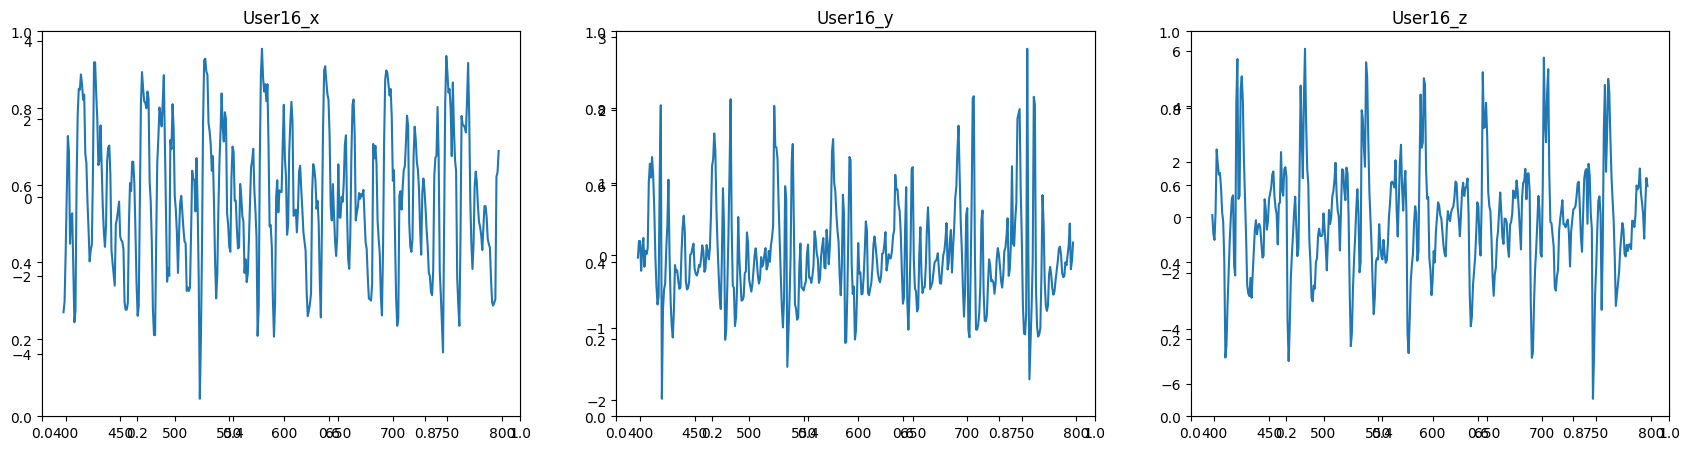

<Figure size 2100x500 with 0 Axes>

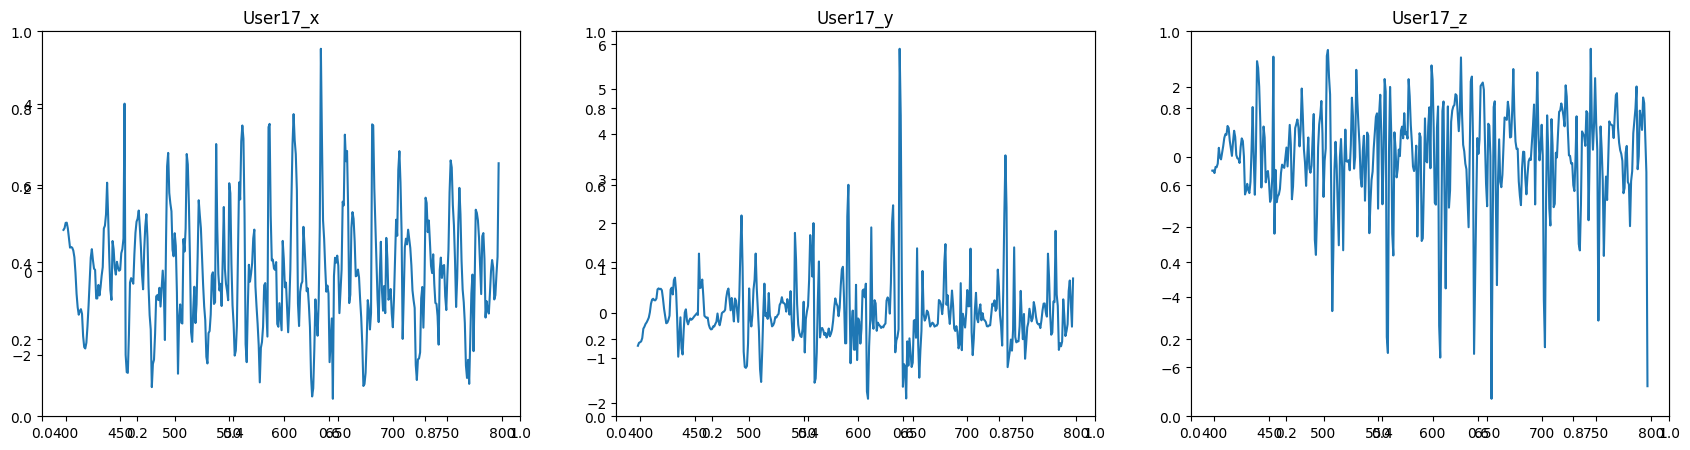

<Figure size 2100x500 with 0 Axes>

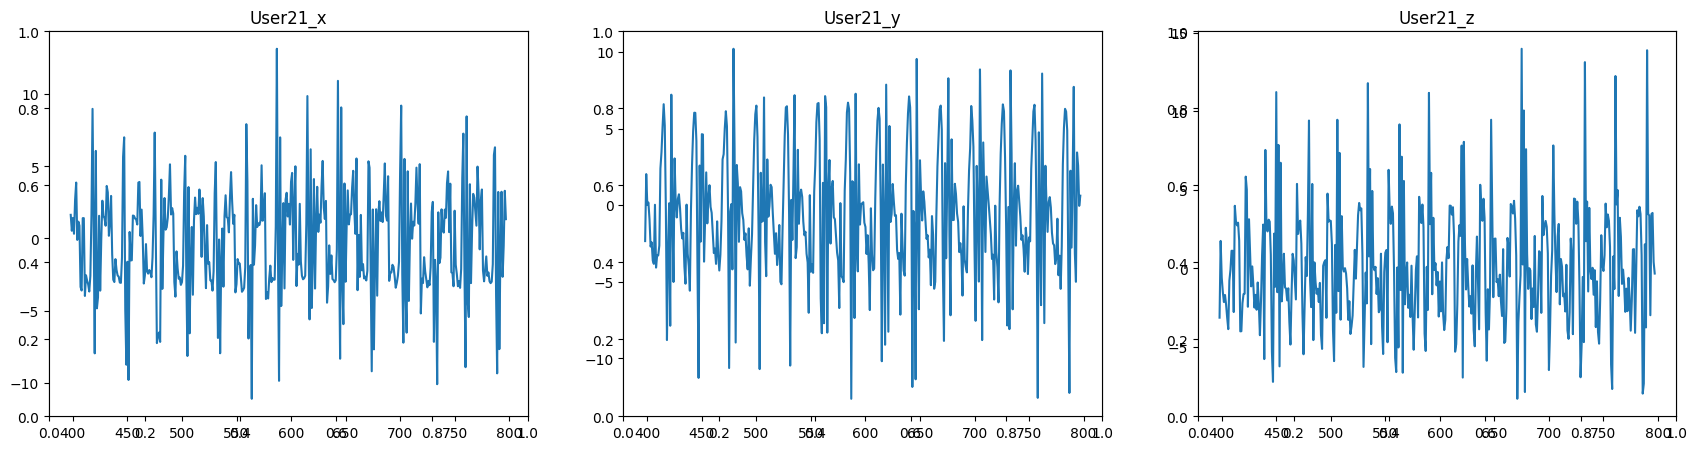

<Figure size 2100x500 with 0 Axes>

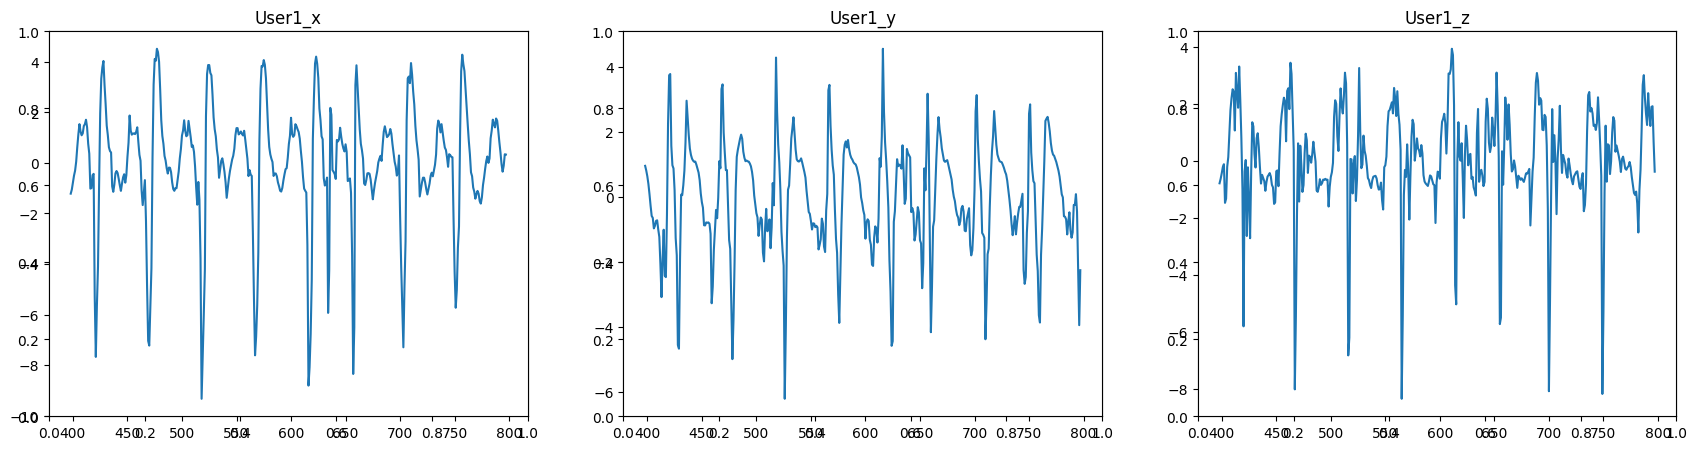

<Figure size 2100x500 with 0 Axes>

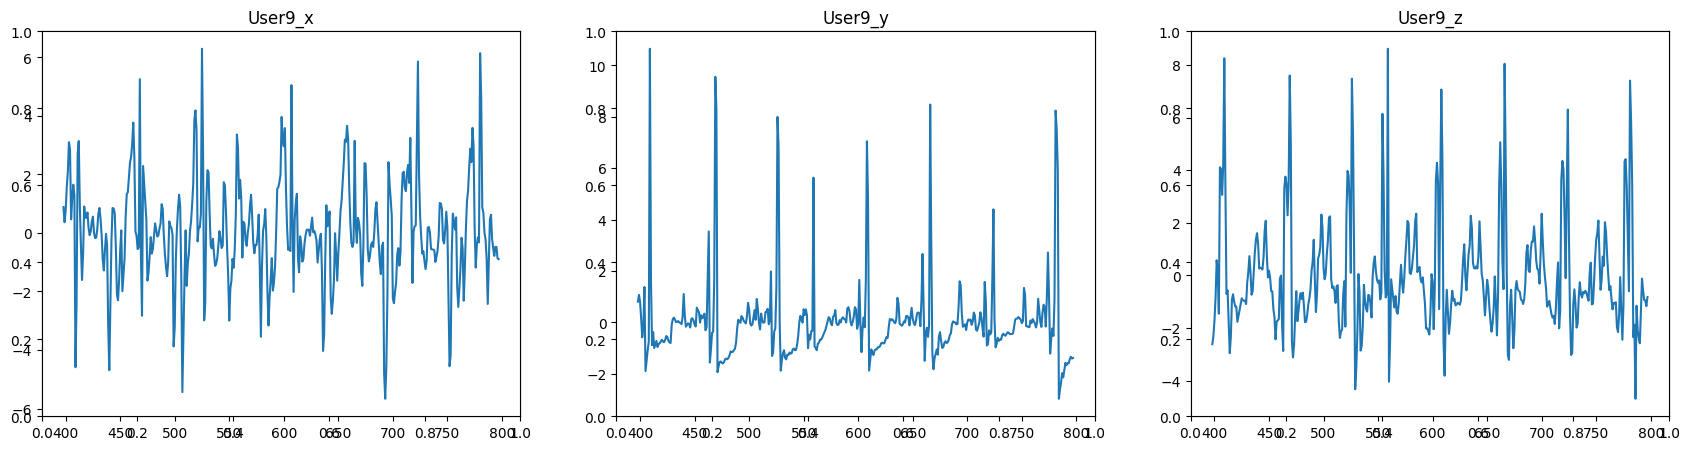

<Figure size 2100x500 with 0 Axes>

In [ ]:
# Lets plot the raw data to see the characteristics
# basically we want to see if walking pattern is different for different individuals.
# for that we will take random chunk of walking patterns from different users and plot them to show the distinctiveness
# Following code generates random number to decide the starting point of the wchunk of data that we will use to plot and analyze.
# Then we will just plot some chunk of data from same sensors for different indidiviauls.
random_start = random.randint(200, 400) # generating a random number between 200 and 400
random_start2 = random.randint(400, 600) # generating a random  number between 400 and 600, to avoid overlap with the previous window we start this with 400
print(f'random_start:{random_start}')
print(f'random_start2:{random_start2}')
plt.rcParams['figure.figsize'] = (21, 5) # creates a blank figure of the specified dimensions

for user in RANDOM_USERS: # traversing through all the random_users and their data files
  fig, ax = plt.subplots(1, 3) #, sharex='col', sharey='row')
  for sensor in SENSOR_FILES[0:1]: # we are playing with []'clean_LAcc.txt']
      # file_path = DATA_PATH+ "\\"+ user + "\\" + 'Training' + "\\" +  "sensor"
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor) # /home/dataset, "user", "clean_LAcc.txt" ==> '/home/dataset/dataset/clean_LAcc.txt'
      print(file_path)
      # now we can use pandas to read the data files from the current path
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      print(raw_data.head()) # this will print first 5 rows in the pandas dataframe
      raw_data = raw_data.iloc[random_start:random_start+400] # slicing the dataframe
      xyz = raw_data[[user+'_x', user+'_y',user+'_z']]
      ax = fig.add_subplot(1, 3, 1)
      ax.title.set_text(user+'_x')
      xyz[user+'_x'].plot()
      ax = fig.add_subplot(1, 3, 2)
      ax.title.set_text(user+'_y')
      xyz[user+'_y'].plot()
      ax = fig.add_subplot(1, 3, 3)
      ax.title.set_text(user+'_z')
      xyz[user+'_z'].plot()
      plt.figure()

# Preprocessing | smoothing
---



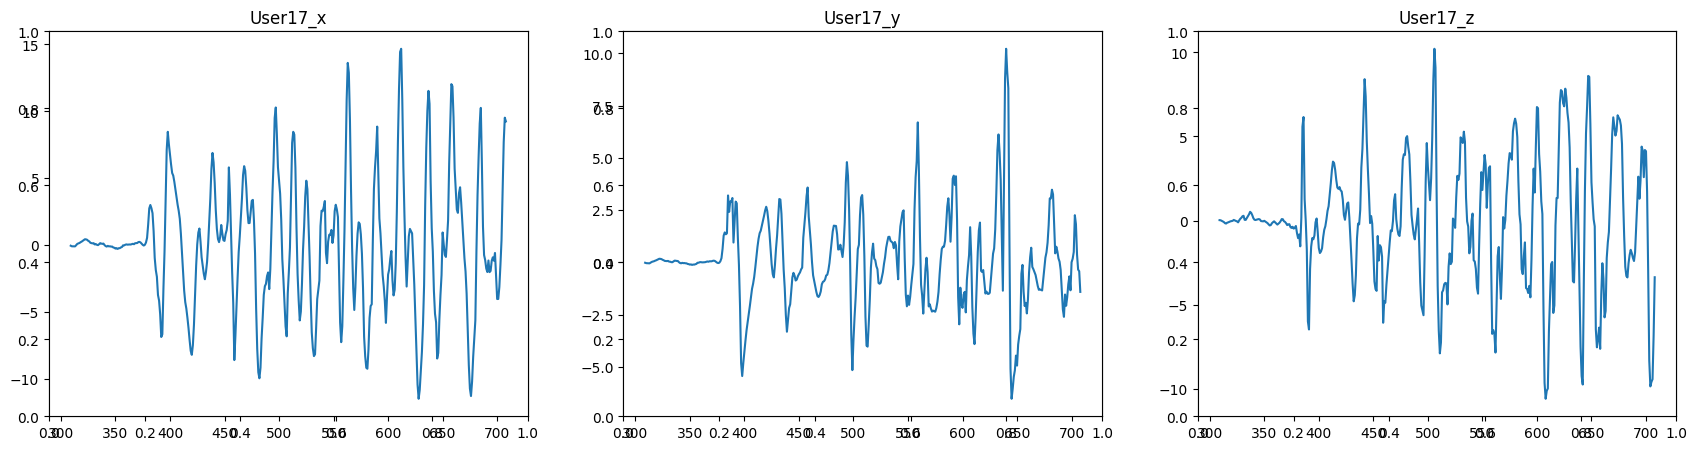

<Figure size 2100x500 with 0 Axes>

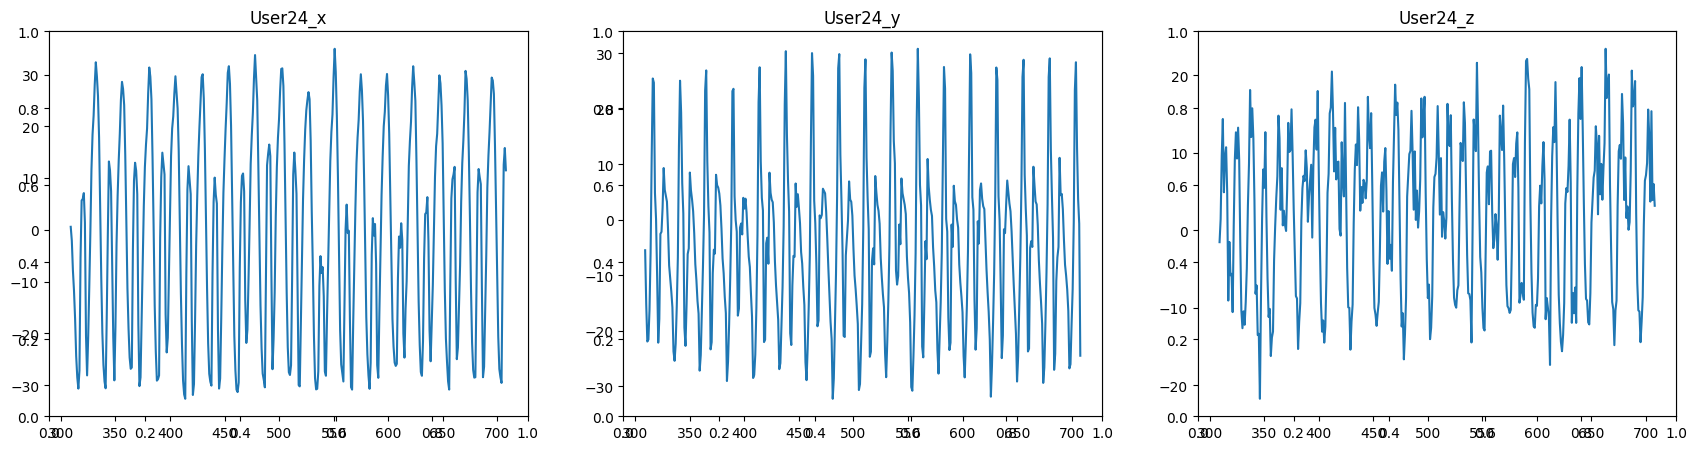

<Figure size 2100x500 with 0 Axes>

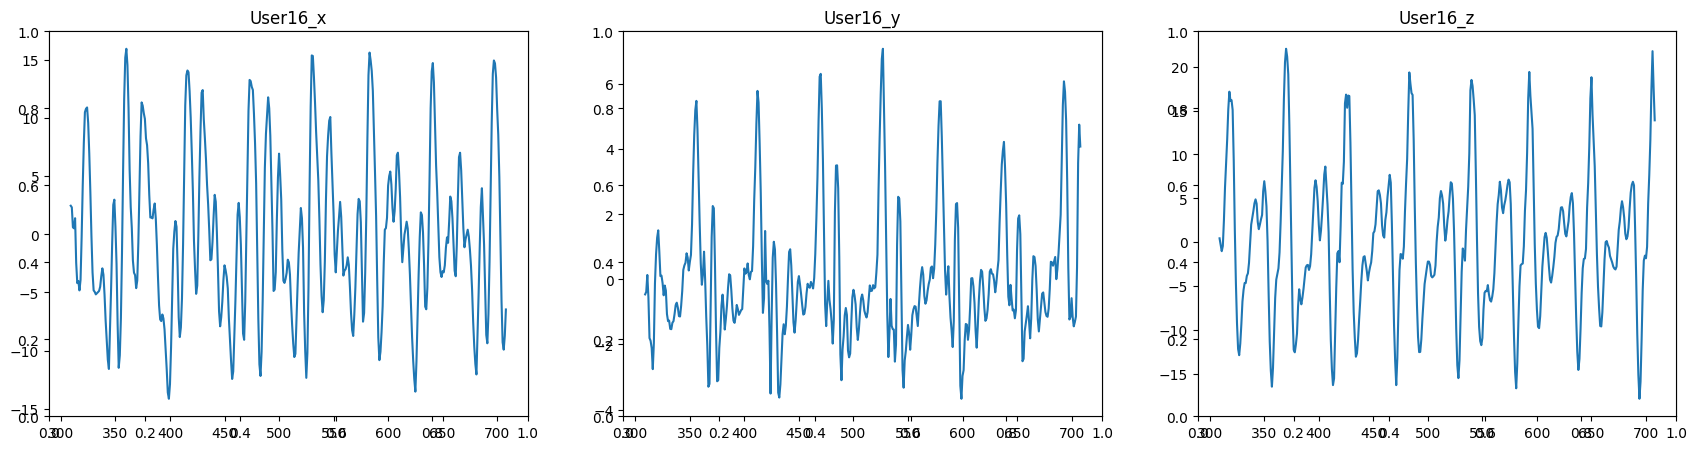

<Figure size 2100x500 with 0 Axes>

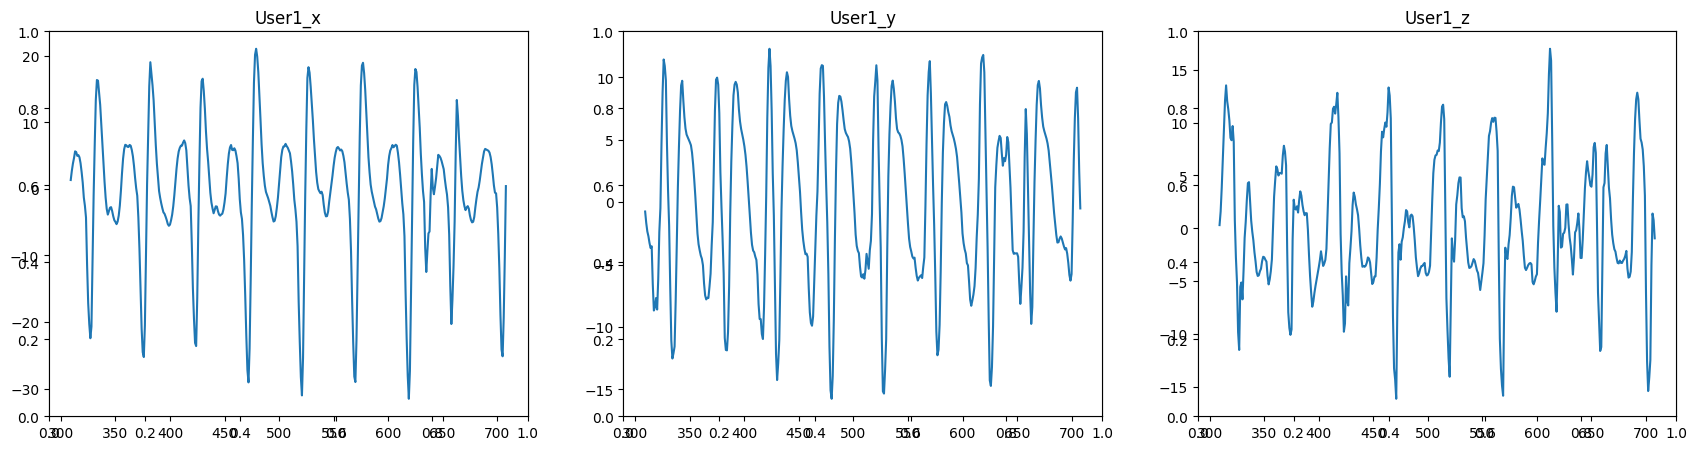

<Figure size 2100x500 with 0 Axes>

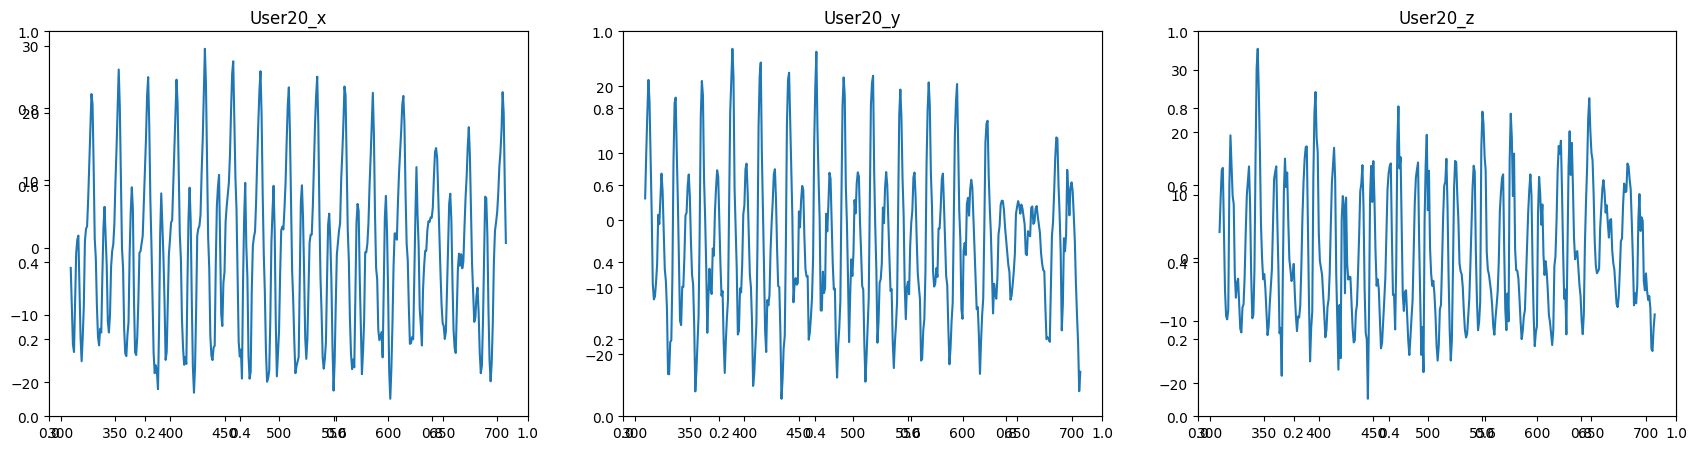

<Figure size 2100x500 with 0 Axes>

In [ ]:
# Lets smoothen the data and plot
plt.rcParams['figure.figsize'] = (21, 5)
for user in RANDOM_USERS:
  fig, ax = plt.subplots(1, 3)#, sharex='col', sharey='row')
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      #selects the spesific rows of data to focus on (400 interval width )
      raw_data = raw_data.iloc[random_start:random_start+400]
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      ax = fig.add_subplot(1, 3, 1)
      ax.title.set_text(user+'_x')
      #uses moving average (rolling sum) to smoothen pattern
      xyz[user+'_x'].rolling(5, min_periods=1).sum().plot()
      ax = fig.add_subplot(1, 3, 2)
      ax.title.set_text(user+'_y')
      xyz[user+'_y'].rolling(5, min_periods=1).sum().plot()
      ax = fig.add_subplot(1, 3, 3)
      ax.title.set_text(user+'_z')
      xyz[user+'_z'].rolling(5, min_periods=1).sum().plot()
      plt.figure()

# EDA via density plots

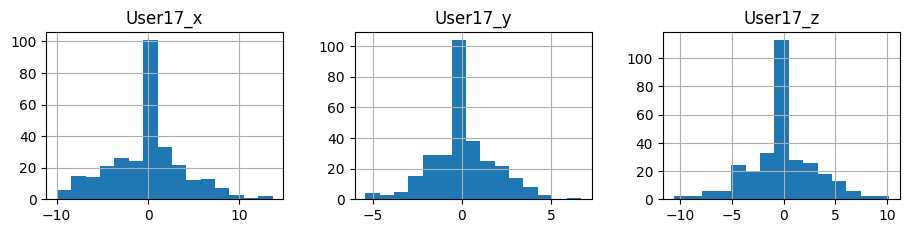

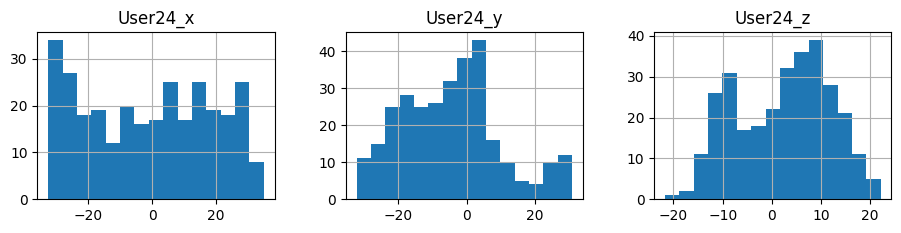

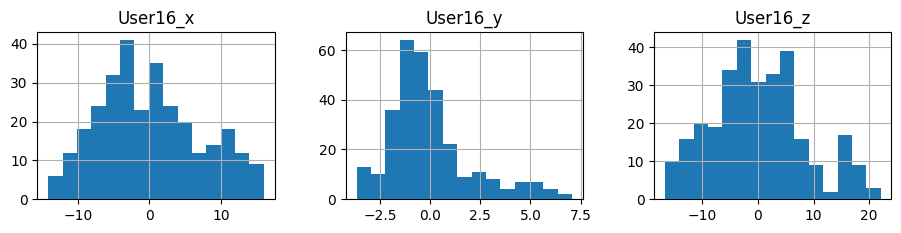

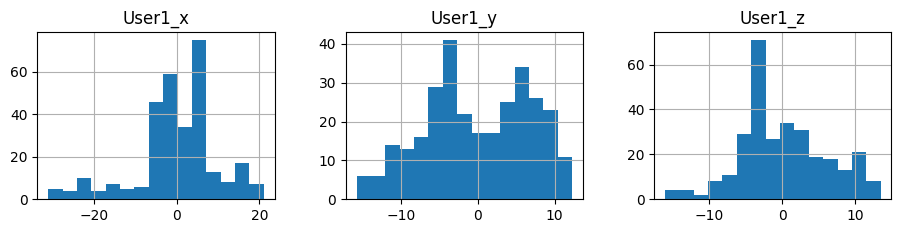

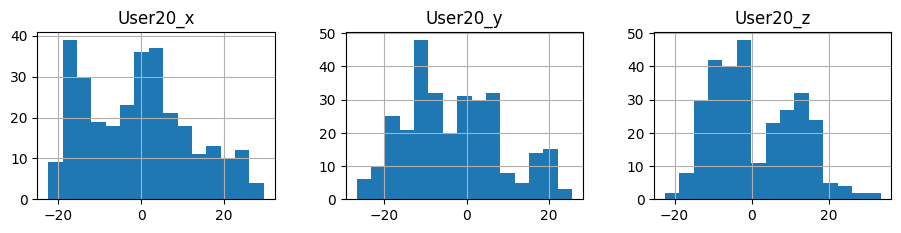

In [ ]:
# Lets histogram the raw data to see the characteristics
for user in RANDOM_USERS:
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      # load the LAcc sensor for each randomly selected user
      # what does 'time1' and 'time 2' do?
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      # selects start - end row or 300 interval & stored by rolling sum
      raw_data = raw_data.iloc[random_start:random_start+300].rolling(5, min_periods=1).sum()
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      #graph histogram
      xyz.hist(bins=15, figsize=(15, 5), layout=(2, 4))



```
# This is formatted as code
```

# EDA via KDE plots

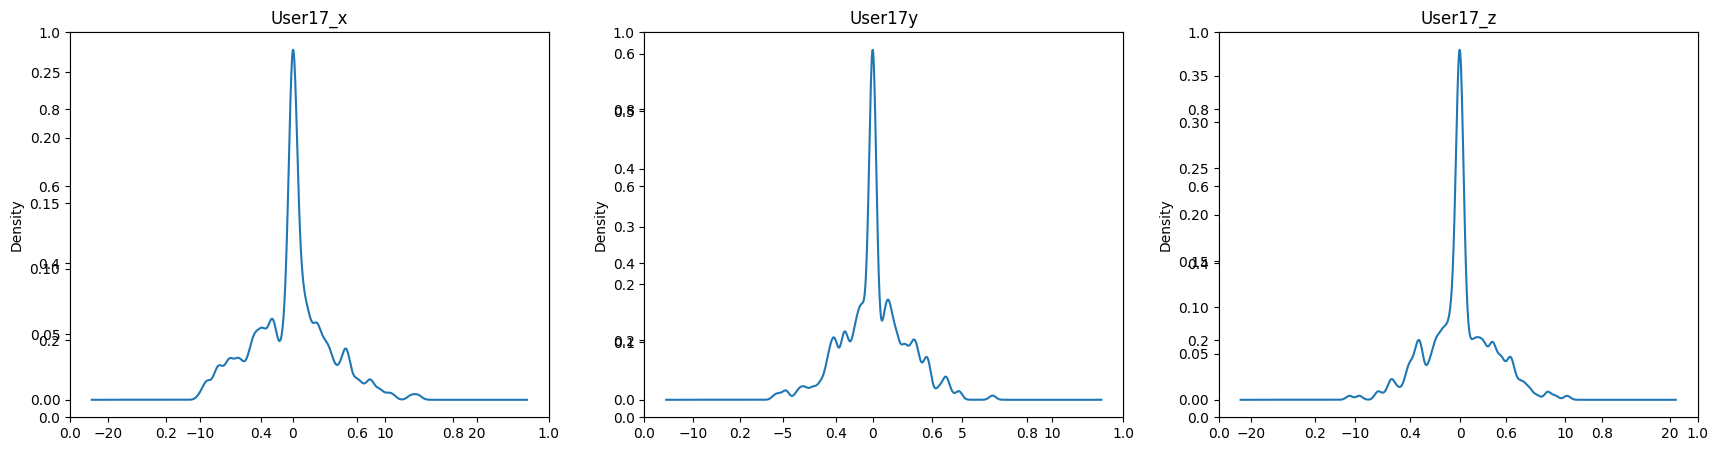

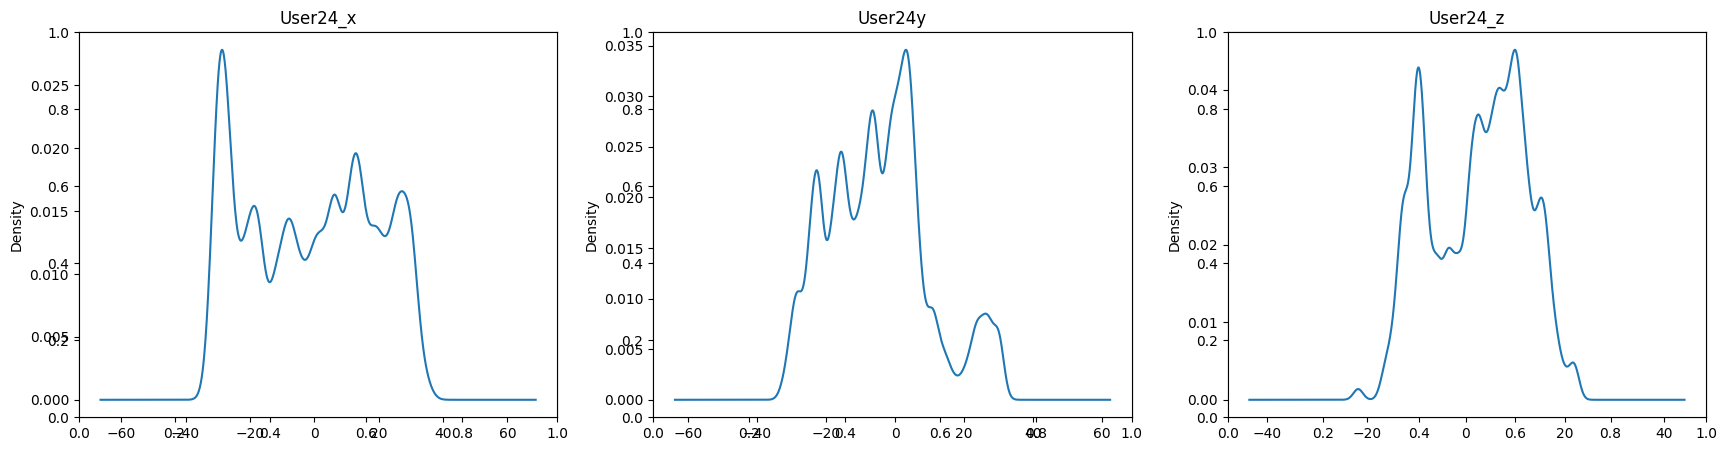

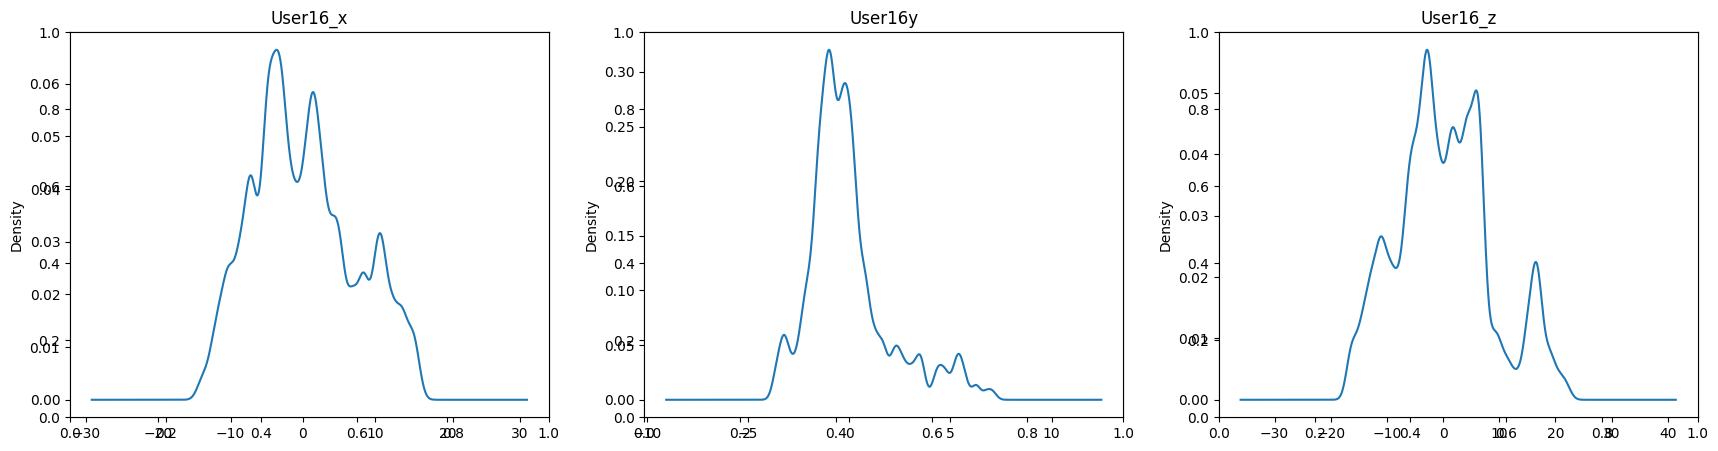

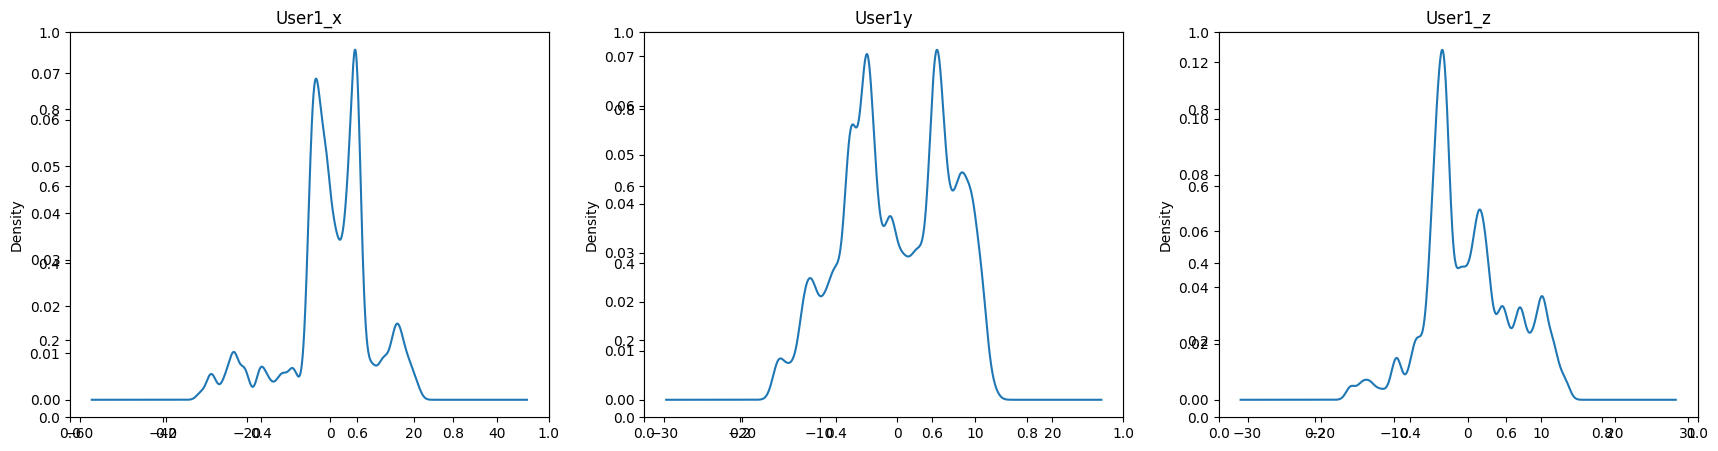

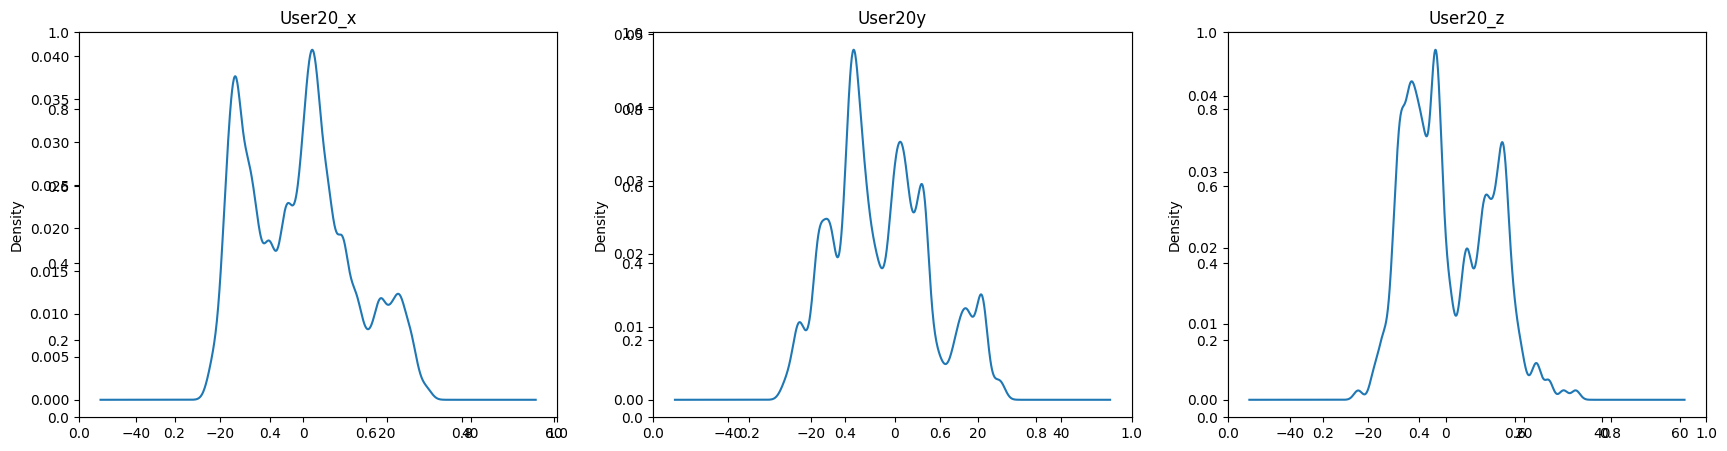

In [ ]:
# Lets KDE the raw data to see the characteristics
# Beware of the bandwidth parameters.... you will mess up the signal if it is too LOW
for user in RANDOM_USERS:
  fig, ax = plt.subplots(1, 3)
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      raw_data = raw_data.iloc[random_start:random_start+300].rolling(5, min_periods=1).sum()
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      ax = fig.add_subplot(1, 3, 1)
      # Generate Kernel Density Estimate plot
      #small bandwidth (bw_method) = overfitting / large bandwidth = underfitting
      xyz[user+'_x'].plot.kde(title=user+'_x',bw_method=.1)
      ax = fig.add_subplot(1, 3, 2)
      xyz[user+'_y'].plot.kde(title=user+'y',bw_method=.1)
      ax = fig.add_subplot(1, 3, 3)
      xyz[user+'_z'].plot.kde(title=user+'_z',bw_method=.1)

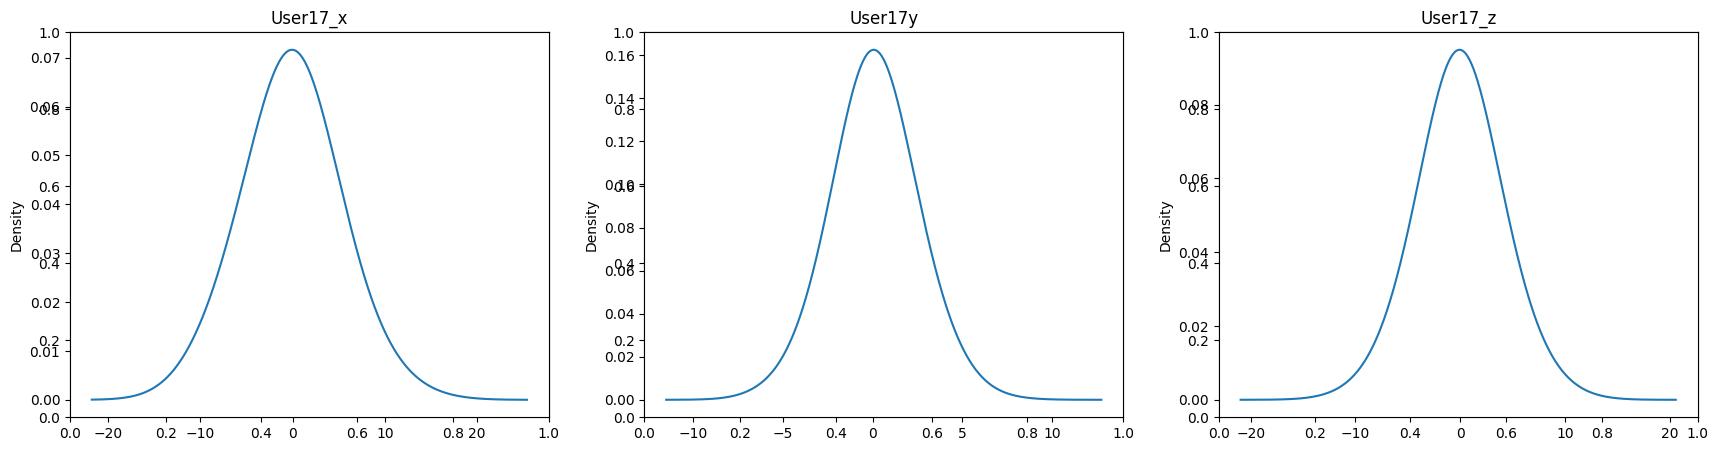

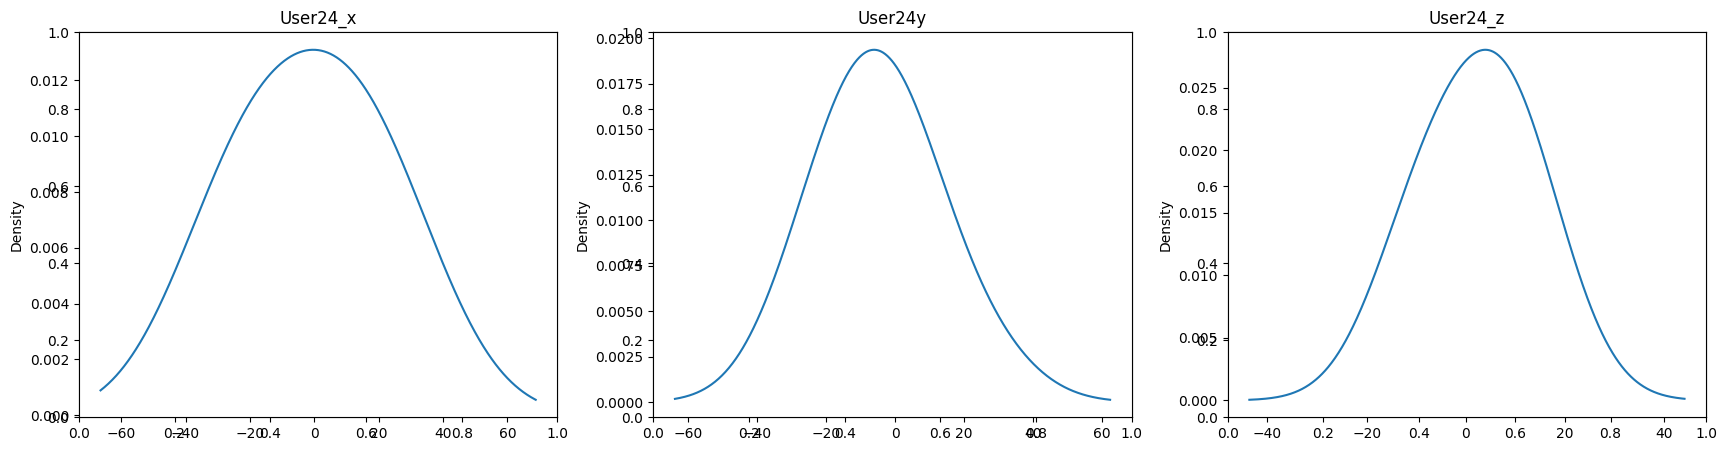

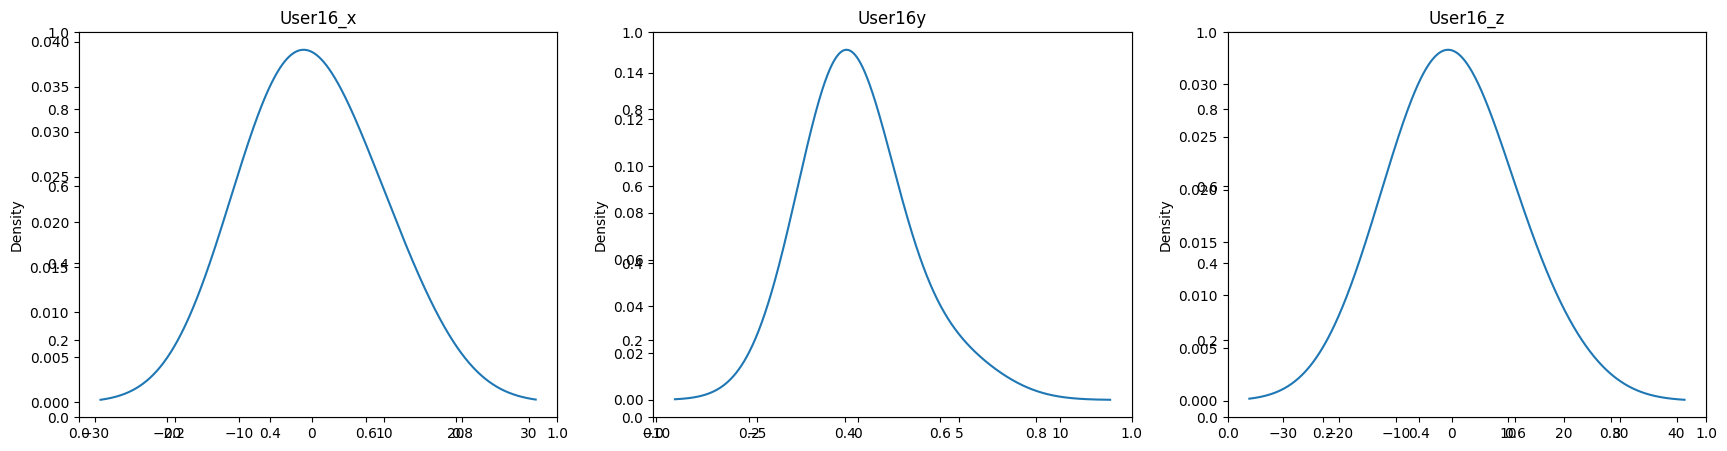

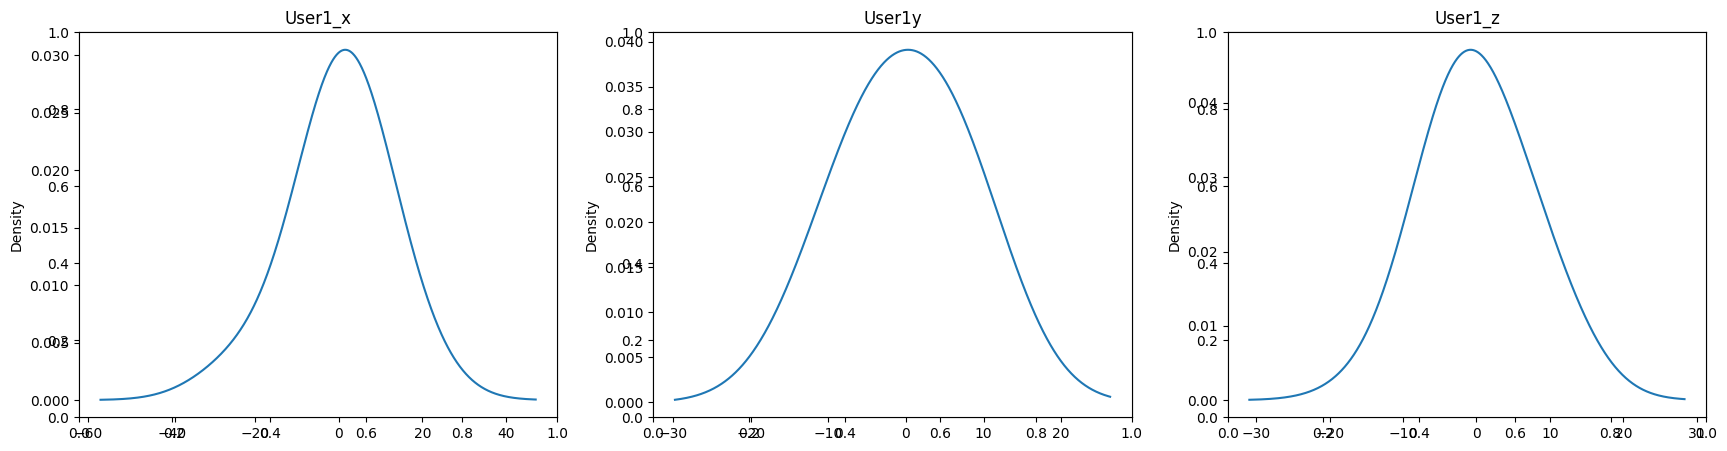

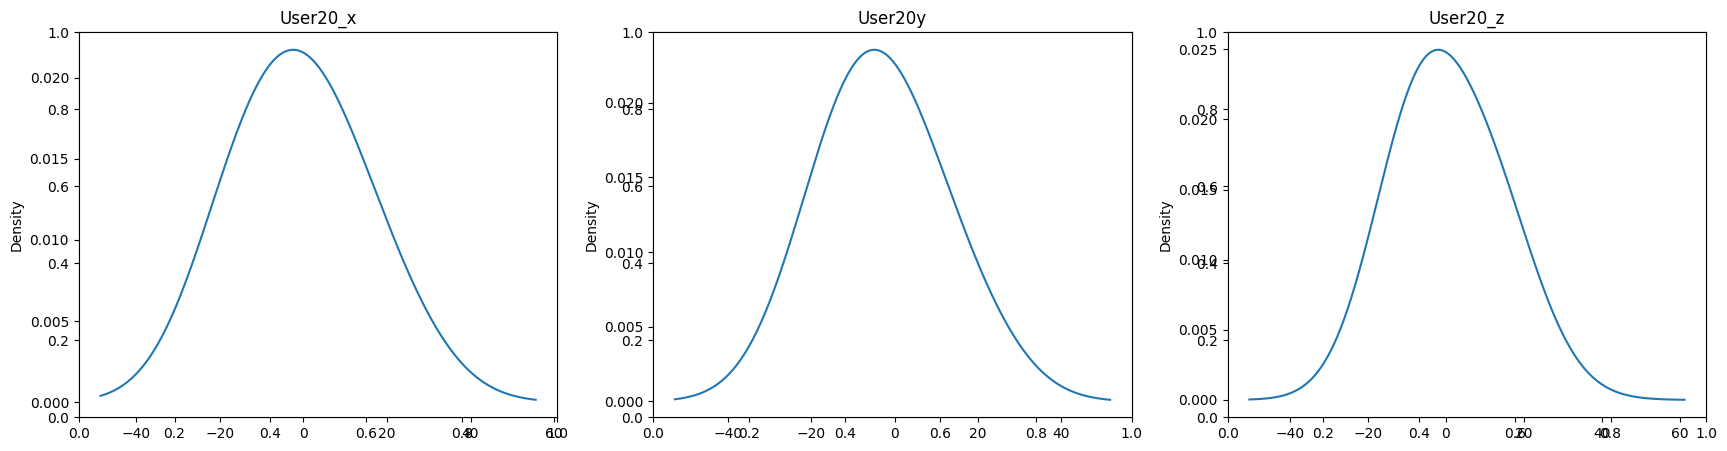

In [ ]:
# Lets KDE the raw data to see the characteristics
# Beware of the bandwidth parameters.... yo will mess up the signal if it is too HIGH
for user in RANDOM_USERS:
  fig, ax = plt.subplots(1, 3)
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      raw_data = raw_data.iloc[random_start:random_start+300].rolling(5, min_periods=1).sum()
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      ax = fig.add_subplot(1, 3, 1)
      xyz[user+'_x'].plot.kde(title=user+'_x',bw_method=1)
      ax = fig.add_subplot(1, 3, 2)
      xyz[user+'_y'].plot.kde(title=user+'y',bw_method=1)
      ax = fig.add_subplot(1, 3, 3)
      xyz[user+'_z'].plot.kde(title=user+'_z',bw_method=1)

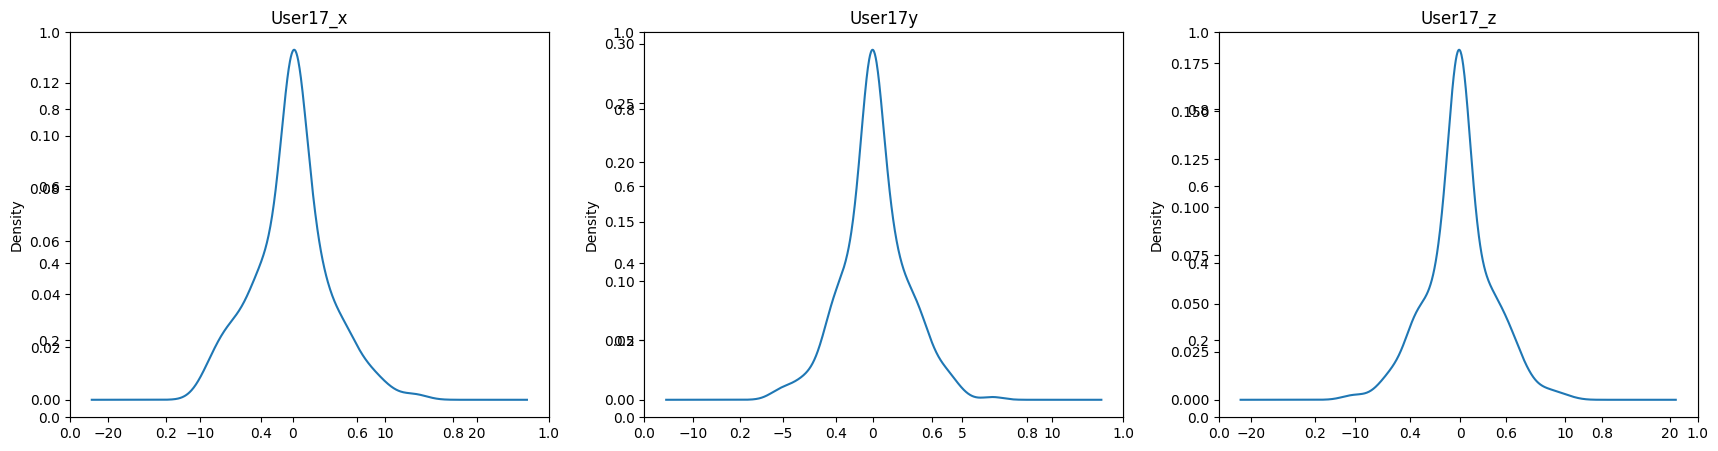

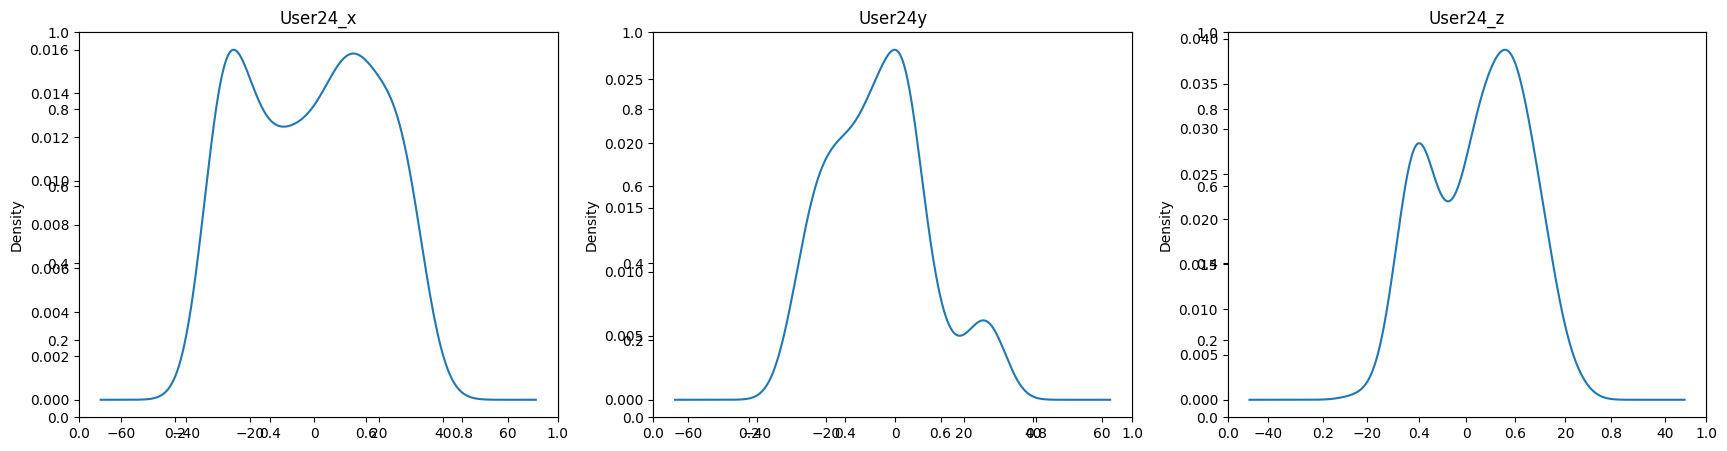

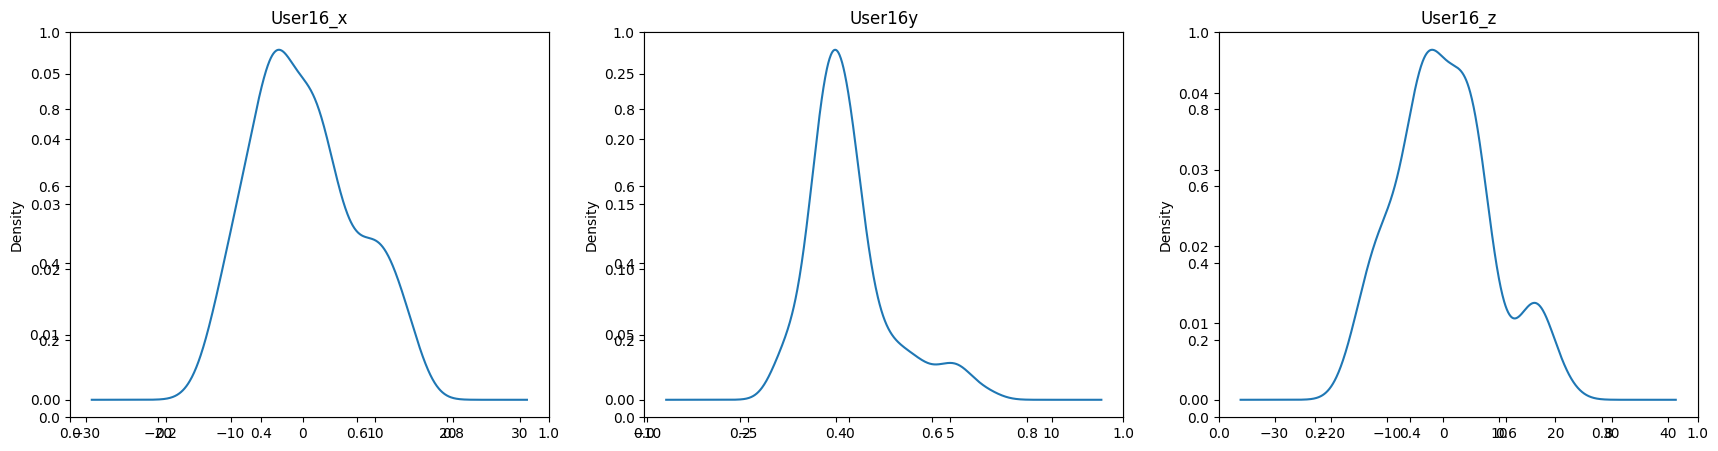

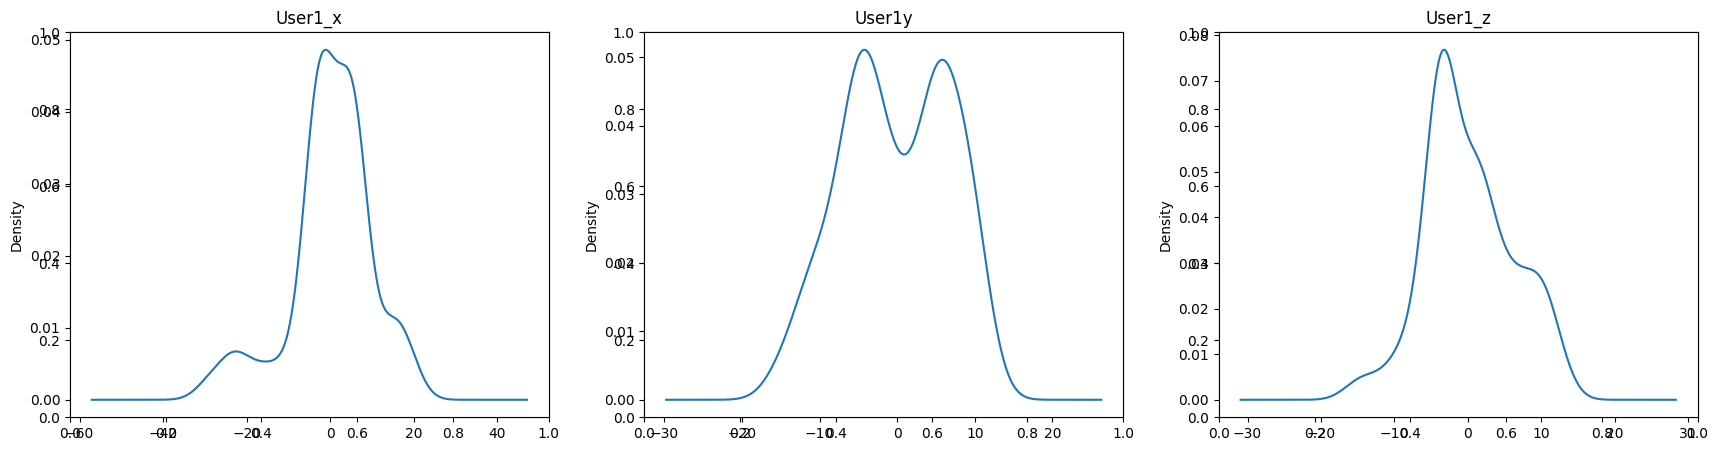

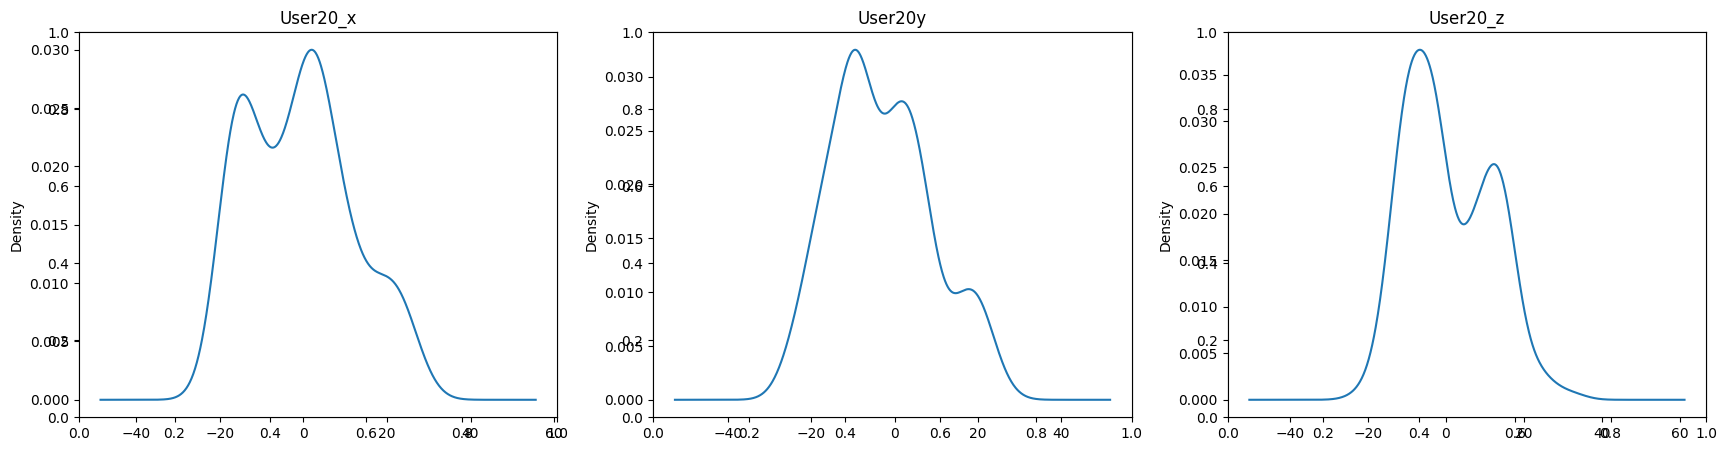

In [ ]:
# Lets KDE the raw data to see the characteristics
for user in RANDOM_USERS:
  fig, ax = plt.subplots(1, 3)
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      raw_data = raw_data.iloc[random_start:random_start+300].rolling(5, min_periods=1).sum()
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      ax = fig.add_subplot(1, 3, 1)
      xyz[user+'_x'].plot.kde(title=user+'_x')
      ax = fig.add_subplot(1, 3, 2)
      xyz[user+'_y'].plot.kde(title=user+'y')
      ax = fig.add_subplot(1, 3, 3)
      xyz[user+'_z'].plot.kde(title=user+'_z')

# EDA via descriptive stats comparison | Inter user

In [ ]:
# Lets see the descrp stats
for user in RANDOM_USERS:
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])

      # the rolling sum of each users x, y, and z measuments for the given 300 rows
      raw_data = raw_data[[user+'_x', user+'_y', user+'_z']][random_start:random_start+300].rolling(5, min_periods=1).sum()
      print(raw_data.describe())

         User17_x    User17_y    User17_z
count  300.000000  300.000000  300.000000
mean    -0.107696    0.115260   -0.032344
std      4.079215    1.809769    3.114508
min     -9.967200   -5.438100  -10.580700
25%     -2.393000   -0.811800   -1.549400
50%      0.052600    0.020200   -0.042750
75%      1.813250    1.017575    1.531525
max     13.619600    6.694000   10.204300
         User24_x    User24_y    User24_z
count  300.000000  300.000000  300.000000
mean    -1.075179   -4.650406    2.302640
std     20.028941   14.560798    9.615112
min    -32.611600  -32.260400  -21.729700
25%    -19.997075  -15.611725   -6.835600
50%      0.314050   -5.176700    3.525600
75%     15.077375    3.699000   10.116375
max     34.992300   30.826600   22.117700
         User16_x    User16_y    User16_z
count  300.000000  300.000000  300.000000
mean     0.128728   -0.036569    0.177432
std      7.080903    2.050096    8.509167
min    -14.138100   -3.669600  -16.679500
25%     -4.891225   -1.283900   -5

# EDA via descriptive stats comparison | Intra-user

309
709
537
937


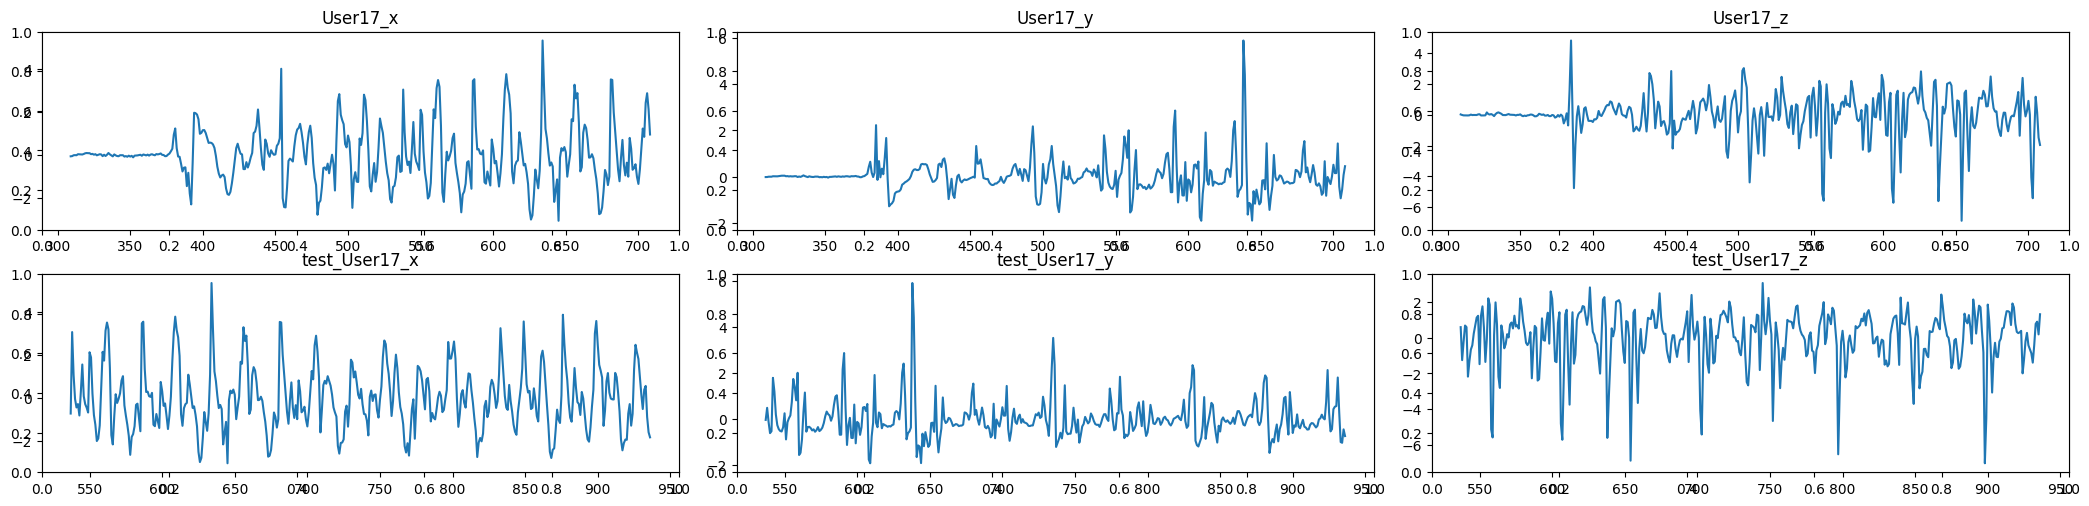

<Figure size 2100x500 with 0 Axes>

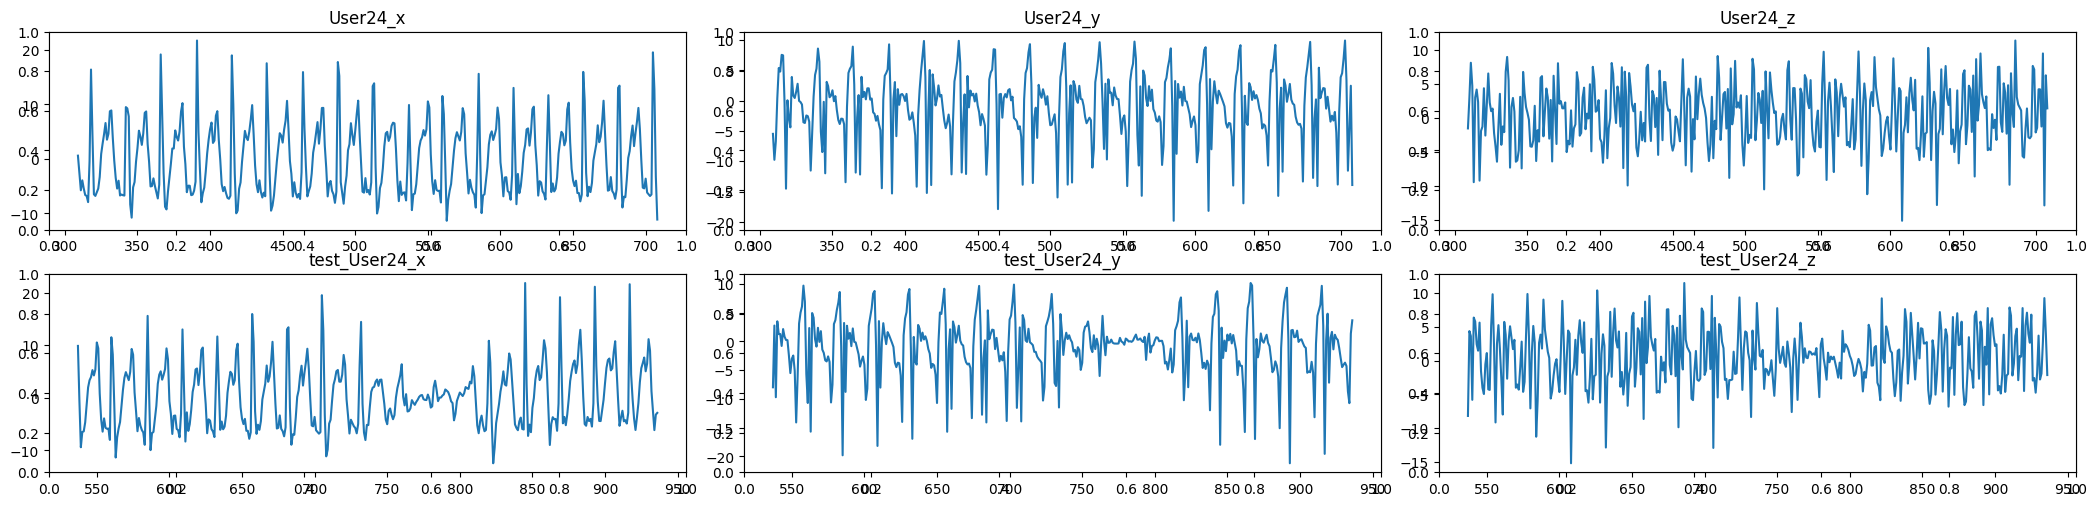

<Figure size 2100x500 with 0 Axes>

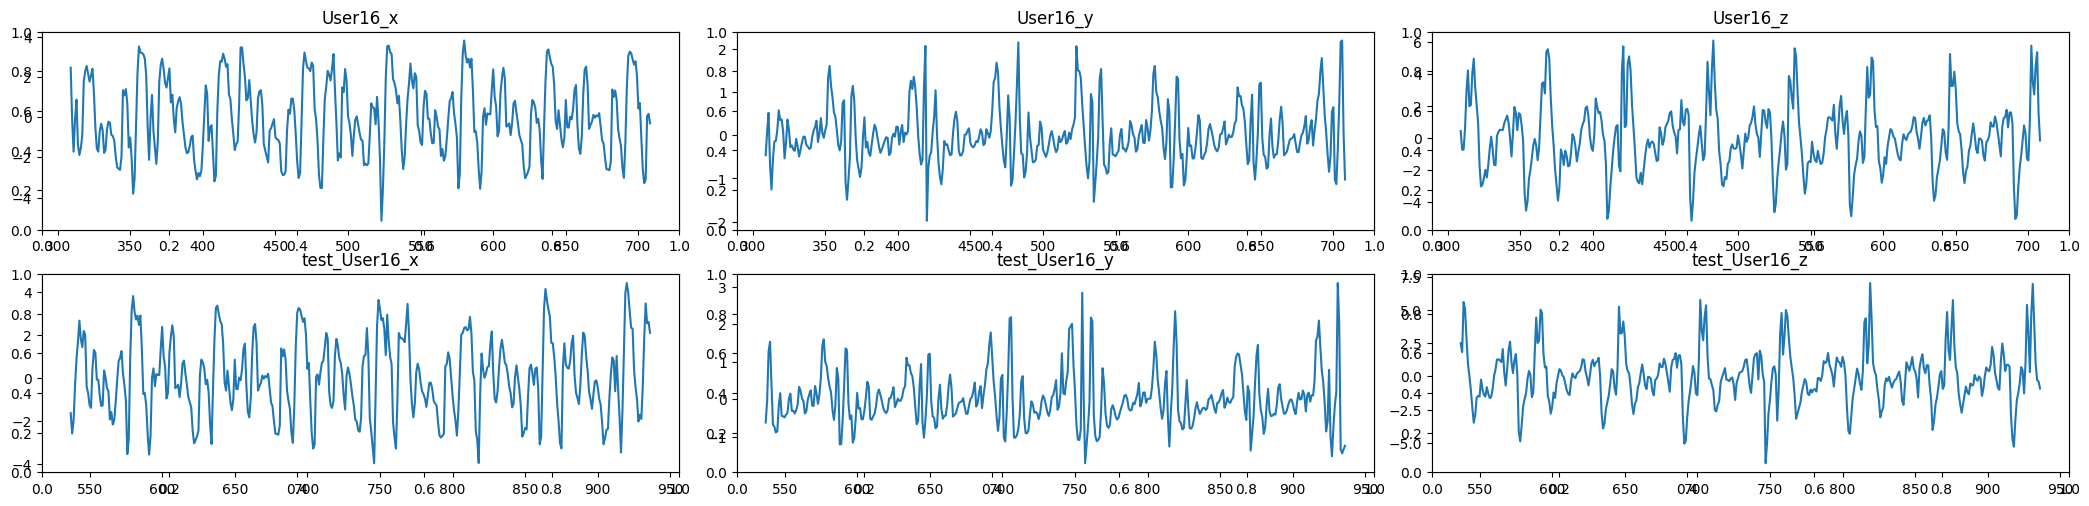

<Figure size 2100x500 with 0 Axes>

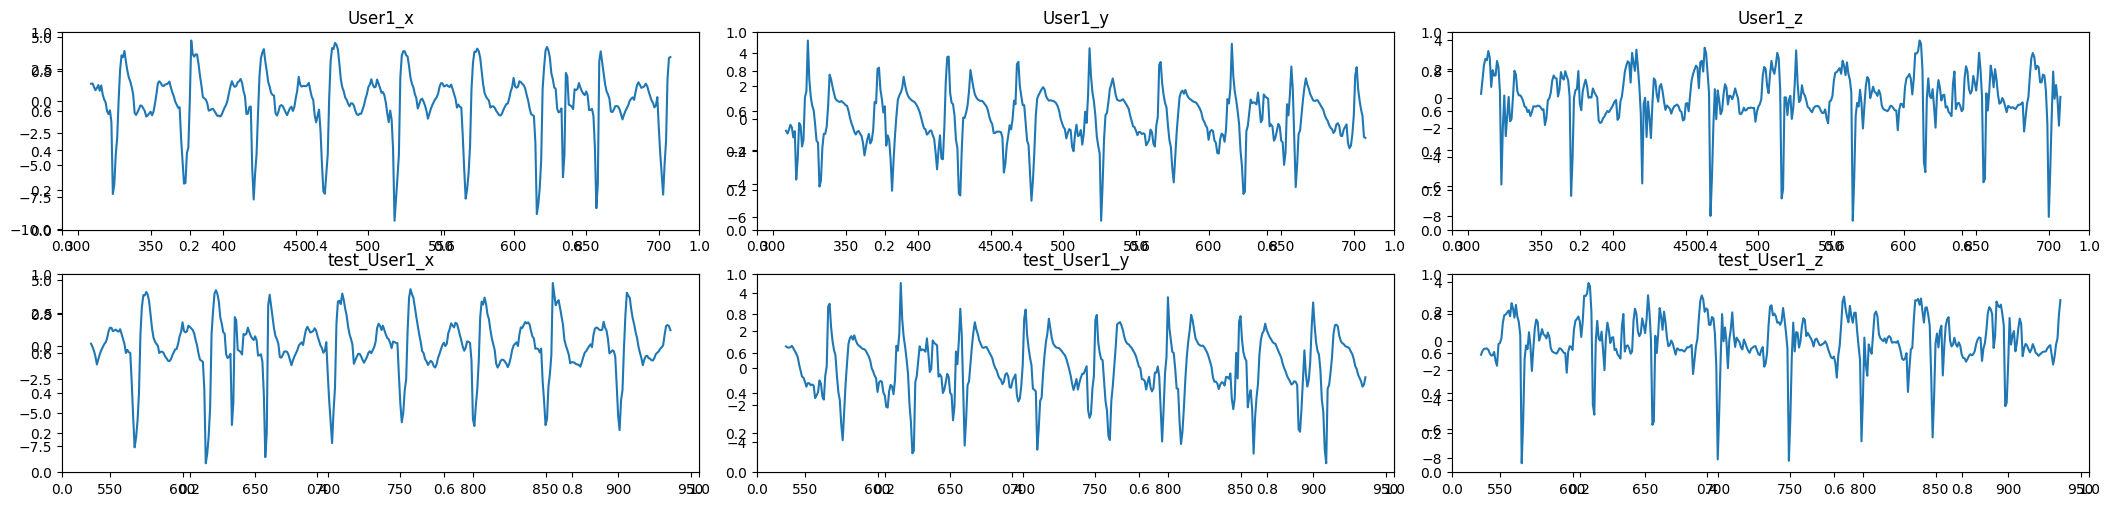

<Figure size 2100x500 with 0 Axes>

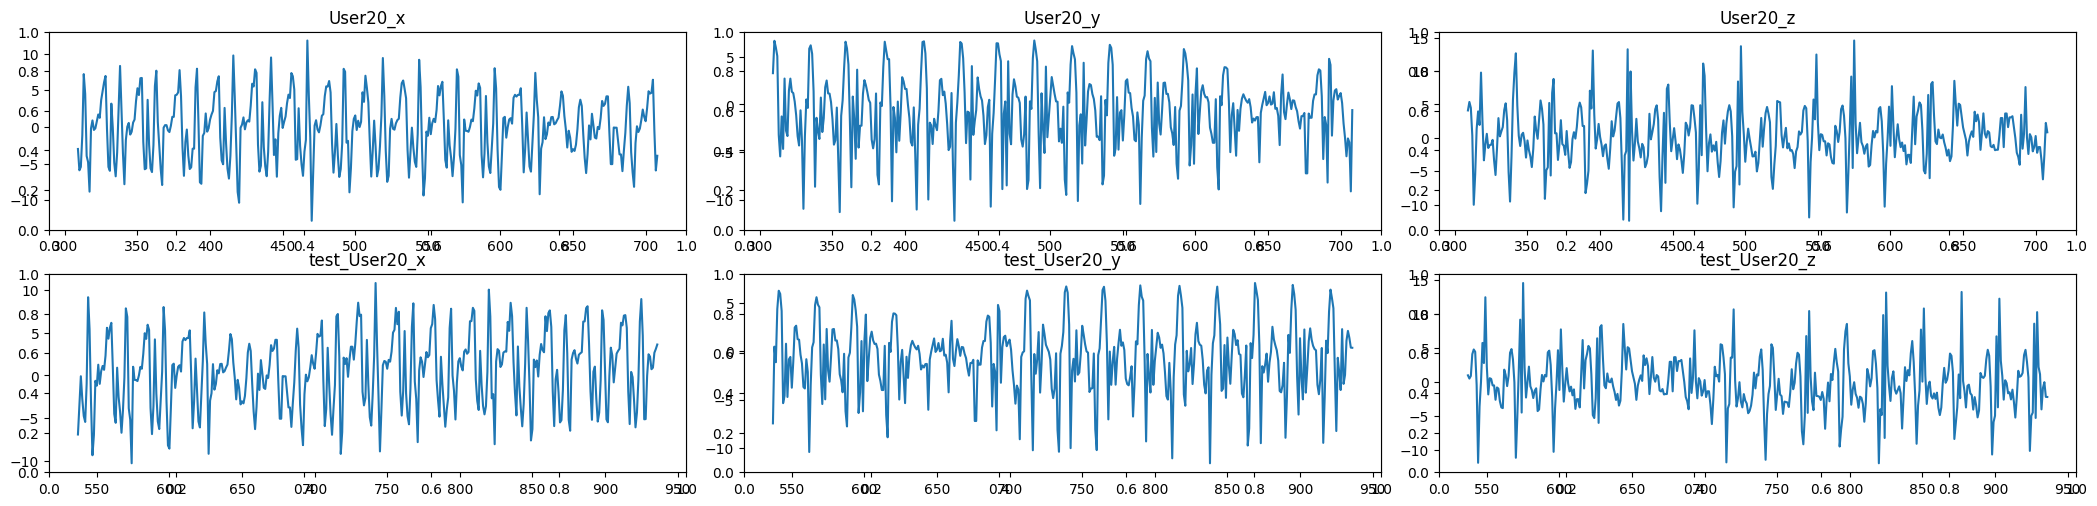

<Figure size 2100x500 with 0 Axes>

In [ ]:
# Intra-user differences
# Lets plot the raw data to see the characteristics
plt.rcParams['figure.figsize'] = (21, 5)
print(random_start)
print(random_start+400)
print(random_start2)
print(random_start2+400)
for user in RANDOM_USERS:
  fig, ax = plt.subplots(2, 3) #, sharex='col', sharey='row')
  #automatically adjusts subplot params so  the subplot fits in to the figure area
  fig.tight_layout()

  #are they supposed to overlap?
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      main_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      raw_data = main_data.iloc[random_start:random_start+400]
      raw_data2 = main_data.iloc[random_start2: random_start2+400]

      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      xyz2 = raw_data2[[user+'_x',user+'_y',user+'_z']]
      ax = fig.add_subplot(2, 3, 1)
      ax.title.set_text(user+'_x')
      xyz[user+'_x'].plot()
      ax = fig.add_subplot(2, 3, 2)
      ax.title.set_text(user+'_y')
      xyz[user+'_y'].plot()
      ax = fig.add_subplot(2, 3, 3)
      ax.title.set_text(user+'_z')
      xyz[user+'_z'].plot()

      ax = fig.add_subplot(2, 3, 4)
      ax.title.set_text('test_'+user+'_x')
      xyz2[user+'_x'].plot()
      ax = fig.add_subplot(2, 3, 5)
      ax.title.set_text('test_'+user+'_y')
      xyz2[user+'_y'].plot()
      ax = fig.add_subplot(2, 3, 6)
      ax.title.set_text('test_'+user+'_z')
      xyz2[user+'_z'].plot()

      plt.figure()

# Intra-user differences: descriptive stats

In [ ]:
# Intra-user differences: descriptive stats
plt.rcParams['figure.figsize'] = (21, 5)
for user in RANDOM_USERS:
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user,'Training', sensor)
      main_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      raw_data = main_data.iloc[random_start:random_start+400]
      raw_data2 = main_data.iloc[random_start2: random_start2+400]
      xyz = raw_data[[user+'_x',user+'_y',user+'_z']]
      xyz2 = raw_data2[[user+'_x',user+'_y',user+'_z']]
      print(xyz.describe())
      print(xyz2.describe())


         User17_x    User17_y    User17_z
count  400.000000  400.000000  400.000000
mean     0.010969    0.011299   -0.019311
std      1.285522    0.736076    1.380460
min     -3.045100   -1.915200   -6.893600
25%     -0.757775   -0.298000   -0.389325
50%     -0.011200   -0.011850    0.006400
75%      0.541750    0.219125    0.651150
max      5.323200    5.901600    4.839700
         User17_x    User17_y    User17_z
count  400.000000  400.000000  400.000000
mean    -0.000417    0.004031   -0.000174
std      1.448593    0.828150    1.559728
min     -3.045100   -1.915200   -7.039500
25%     -0.908275   -0.400125   -0.695425
50%     -0.144450   -0.132150    0.265800
75%      0.818875    0.243600    0.999325
max      5.323200    5.901600    3.075300
         User24_x    User24_y    User24_z
count  400.000000  400.000000  400.000000
mean    -0.172613   -0.973837    0.493538
std      6.539535    5.744659    4.658992
min    -11.338200  -19.802400  -15.153800
25%     -5.921525   -3.574200   -2

# Data segmentation | sliding window

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=358efdd7522b75233d97b970efd2e07c0e19257db02d865bc79bae1fc05e389e
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
num_samples 3468
num_unique_stamps 73
47
   User1_x  User1_y  User1_z         time1       time2  window_id
0  -0.7444  -1.4578   0.4636  220217734728  1406951319          0
1   0.1111  -0.5857   0.4621  220217754322  1406951319          0
2   0.6734   0.3846   0.4231  220217774130  1406951319          0
3  -0.1369  -1.9196   0.0804  220217805047  1406951319          0
4   0.1058  -0.9870   0.0349  220217834011  1406951319          0


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

     User1_x  User1_y  User1_z         time1       time2  window_id
188  -1.0314   0.6605   0.8686  220221838131  1406951323          1
189  -1.0787   0.6622   0.5795  220221858152  1406951323          1
190  -1.0658   0.6666  -0.1488  220221879120  1406951323          1
191  -0.9223   0.5882  -0.6297  220221897890  1406951323          1
192  -0.8924   0.5532  -0.8319  220221917118  1406951323          1
     User1_x  User1_y  User1_z         time1       time2  window_id
376  -3.6362   0.3639   1.8561  220225659068  1406951326          2
377   0.0255   0.7396  -0.3462  220225713120  1406951326          2
378   4.7071  -1.6507  -0.8090  220225725877  1406951326          2
379   3.6356  -1.0231   0.4640  220225743701  1406951327          2
380   3.4530  -1.3099   0.9203  220225759144  1406951327          2


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


     User1_x  User1_y  User1_z         time1       time2  window_id
564  -0.5152  -0.4249   0.3869  220229434530  1406951330          3
565  -2.7287   0.0813  -8.3437  220229456046  1406951330          3
566  -5.3533   3.2754  -5.4158  220229476648  1406951330          3
567  -7.6144   3.4383  -1.1958  220229497524  1406951330          3
568  -6.8734   2.1825  -0.3145  220229517179  1406951330          3
     User1_x  User1_y  User1_z         time1       time2  window_id
752  -5.0278   1.3564   1.2378  220234466576  1406951335          4
753  -3.3535   0.8134  -0.7272  220234487635  1406951335          4
754  -2.5148   0.4758   0.5854  220234507443  1406951335          4
755   1.1297   0.4116   0.5486  220234527769  1406951335          4
756   3.6282  -0.6872  -0.4592  220234547058  1406951335          4


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


     User1_x  User1_y  User1_z         time1       time2  window_id
940   1.3115  -1.8952   1.3453  220238227113  1406951339          5
941   0.9561  -1.3246   2.8661  220238246646  1406951339          5
942   0.4900  -0.7297   1.8838  220238266607  1406951339          5
943   0.0178  -0.2642   1.7186  220238286628  1406951339          5
944  -1.0211   0.0200   2.4971  220238309762  1406951339          5
      User1_x  User1_y  User1_z         time1       time2  window_id
1128   0.4932  -0.1515  -0.4846  220242015638  1406951343          6
1129   0.4317  -0.4217  -2.1147  220242035171  1406951343          6
1130   0.9849  -0.5805  -0.7137  220242055436  1406951343          6
1131   1.4566  -0.8072   0.0389  220242075488  1406951343          6
1132   1.3888  -0.9237   0.4294  220242095235  1406951343          6


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
1316   0.3324  -1.5399  -0.3379  220246338635  1406951347          7
1317  -0.1666  -0.9428  -5.5075  220246358290  1406951347          7
1318  -2.0353  -0.1438  -5.8305  220246378769  1406951347          7
1319  -3.8748   2.7019  -4.0300  220246398271  1406951347          7
1320  -5.8414   3.0754  -0.3328  220246418323  1406951347          7
      User1_x  User1_y  User1_z         time1       time2  window_id
1504   1.9510  -1.2624   1.5090  220250169002  1406951351          8
1505   1.8651  -0.8111   3.5217  220250192595  1406951351          8
1506   1.4421  -0.3773   3.8957  220250208954  1406951351          8
1507   1.5600  -0.8535   3.4612  220250229768  1406951351          8
1508   1.3977  -1.1486   2.1064  220250249424  1406951351          8


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
1692  -0.0969   1.1650  -2.7449  220254369735  1406951355          9
1693  -0.4117   1.1870  -2.5220  220254373947  1406951355          9
1694  -0.5000   1.0777  -2.4657  220254378647  1406951355          9
1695  -0.2271   0.8223  -2.6545  220254384110  1406951355          9
1696  -0.4404   0.7755  -2.3288  220254389268  1406951355          9


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
1880   2.9682  -0.6751   0.5328  220257944586  1406951359         10
1881   3.5478  -1.2984   1.8935  220257964424  1406951359         10
1882   2.7646  -0.8393   3.2694  220257984507  1406951359         10
1883   2.5803  -0.9434   3.5840  220258004711  1406951359         10
1884   3.5639  -3.1589   4.2010  220258024885  1406951359         10
      User1_x  User1_y  User1_z         time1       time2  window_id
2068   2.6741  -2.9337   1.9470  220261725358  1406951362         11
2069   2.8714  -2.8996   1.4904  220261745349  1406951363         11
2070   2.2048  -1.7884   0.7095  220261765401  1406951363         11
2071   1.2788  -0.8526   1.3433  220261785544  1406951363         11
2072   0.2175  -0.3845  -3.8073  220261808435  1406951363         11


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
2256   0.9182  -1.4292  -1.6485  220265737896  1406951367         12
2257   0.8039  -0.9860  -0.3283  220265757791  1406951367         12
2258   0.6803  -0.7322   0.6388  220265778570  1406951367         12
2259   0.3780  -0.3615   0.3792  220265797763  1406951367         12
2260   0.1152  -0.0601   0.6711  220265817841  1406951367         12
      User1_x  User1_y  User1_z         time1       time2  window_id
2444  -0.9673   0.9137  -0.4803  220269517391  1406951370         13
2445  -0.7868   0.7148  -0.2549  220269537535  1406951370         13
2446  -0.7702   0.5484   0.0365  220269557495  1406951370         13
2447  -0.3041   0.2788  -0.0013  220269578096  1406951370         13
2448   0.0690   0.0706  -0.1340  220269597202  1406951370         13


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
2632  -0.8352   3.3188  -1.3904  220273362927  1406951374         14
2633  -1.5598   3.6282  -1.3406  220273382064  1406951374         14
2634  -1.9720   3.5671  -1.3177  220273401322  1406951374         14
2635  -2.1418   3.1979  -1.3819  220273416033  1406951374         14
2636  -2.4745   2.9433  -1.3162  220273441487  1406951374         14
      User1_x  User1_y  User1_z         time1       time2  window_id
2820  -4.0532   0.6171   1.0763  220277194577  1406951378         15
2821  -3.6099   0.2821   1.3538  220277212584  1406951378         15
2822   0.2071   0.6745   0.6317  220277223541  1406951378         15
2823   4.6691  -1.4532   0.8781  220277237733  1406951378         15
2824   3.6742  -0.9998   2.0656  220277255831  1406951378         15


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id
<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
3008   2.4101  -2.5300   1.2042  220280949254  1406951382         16
3009   2.0994  -2.1504   2.0512  220280966437  1406951382         16
3010   1.9600  -2.0780   1.3777  220280986306  1406951382         16
3011   1.3994  -1.6076   0.8095  220281006297  1406951382         16
3012   0.5380  -0.6226   3.1942  220281026349  1406951382         16
      User1_x  User1_y  User1_z         time1       time2  window_id
3196  -3.3263   2.7644  -2.7760  220285276768  1406951386         17
3197  -3.4390   2.0417  -1.3846  220285301185  1406951386         17
3198  -3.5723   1.4709  -0.2543  220285315773  1406951386         17
3199  -4.4314   0.7631   0.4113  220285335764  1406951386         17
3200  -3.6255   0.4851   0.2769  220285355786  1406951386         17


<ipython-input-14-caa404804451>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data_window['window_id'] = window_id


      User1_x  User1_y  User1_z         time1       time2  window_id
3384   0.7001  -0.1028   0.5338  220289053909  1406951390         18
3385   1.7649   0.0382  -0.3879  220289075944  1406951390         18
3386   1.8904   0.0104  -0.3870  220289095508  1406951390         18
3387   1.8689   0.0074  -1.0916  220289115590  1406951390         18
3388   1.8266  -0.1337  -1.2410  220289135795  1406951390         18


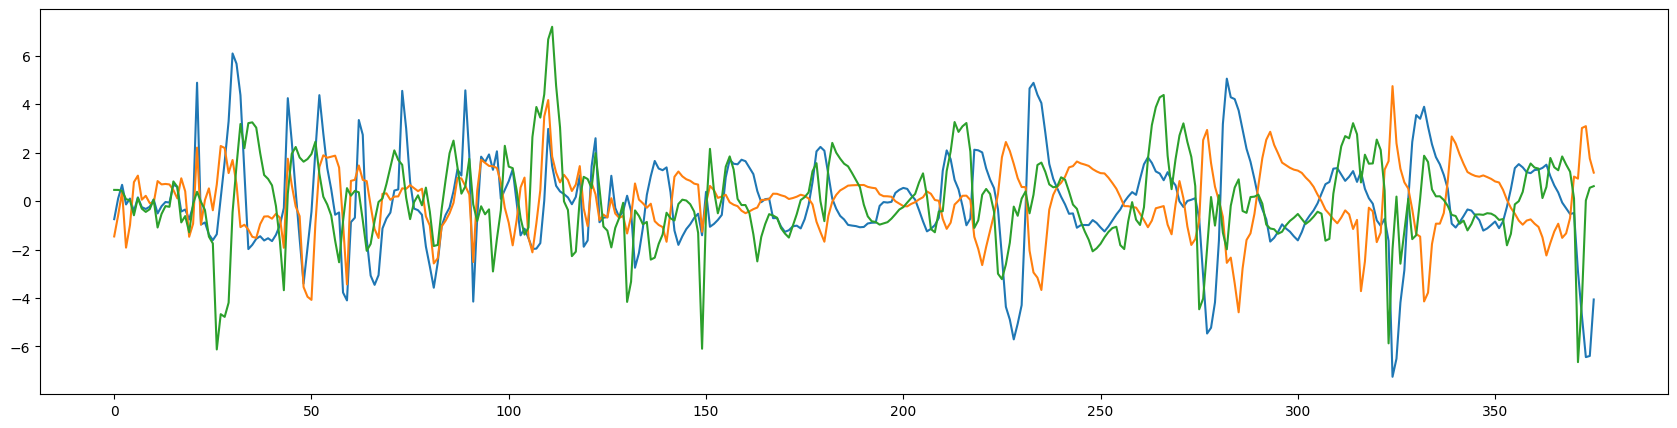

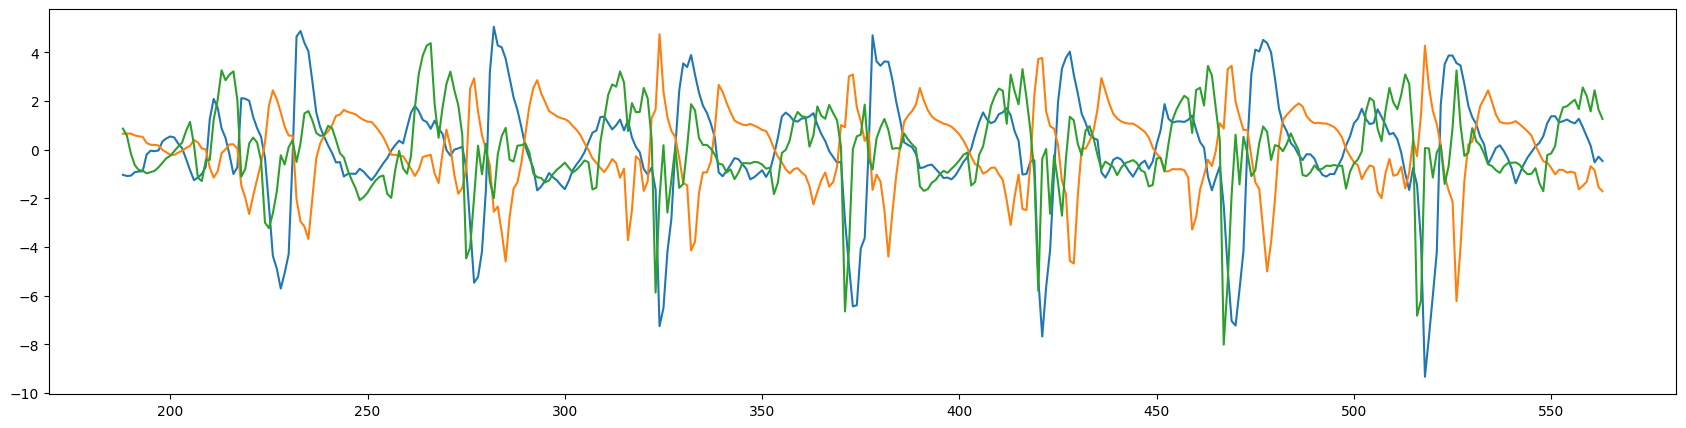

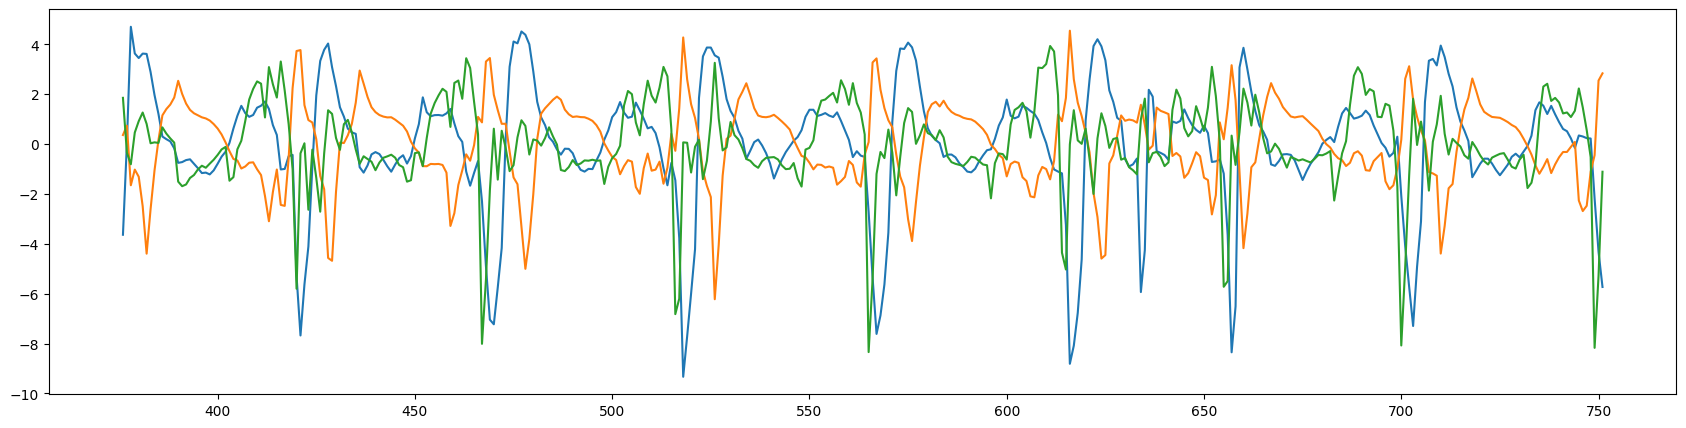

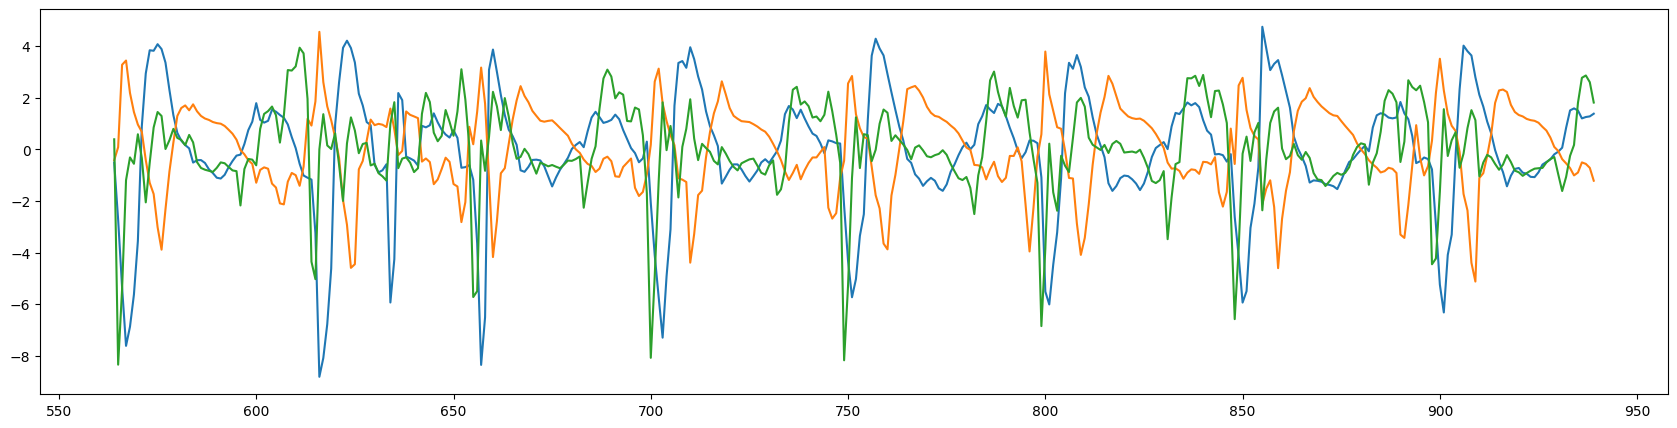

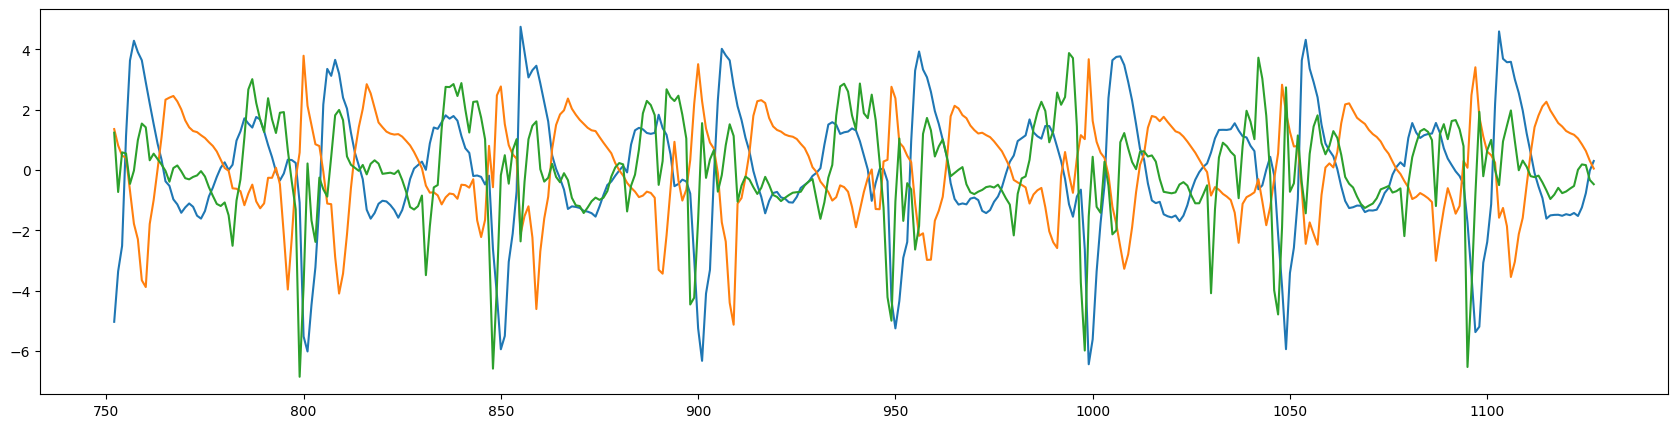

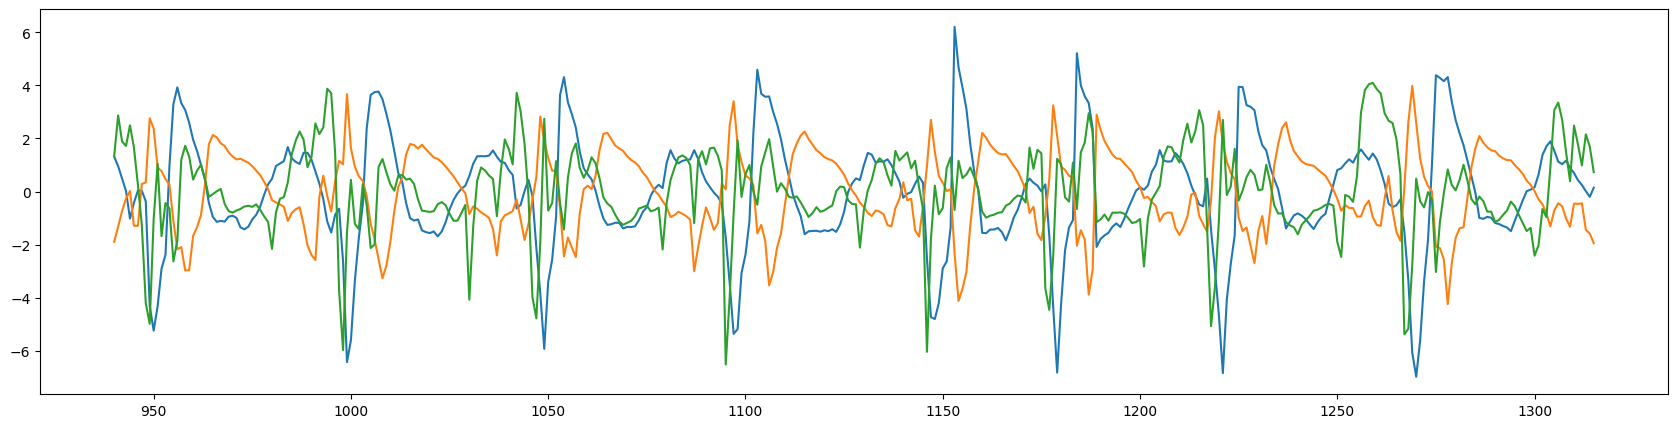

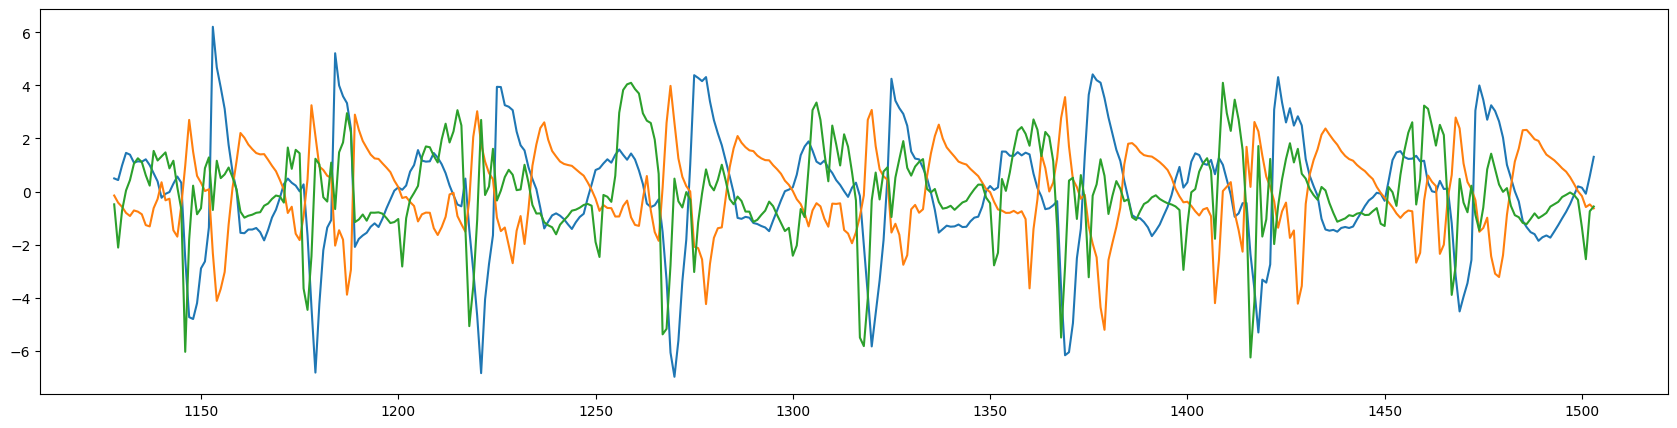

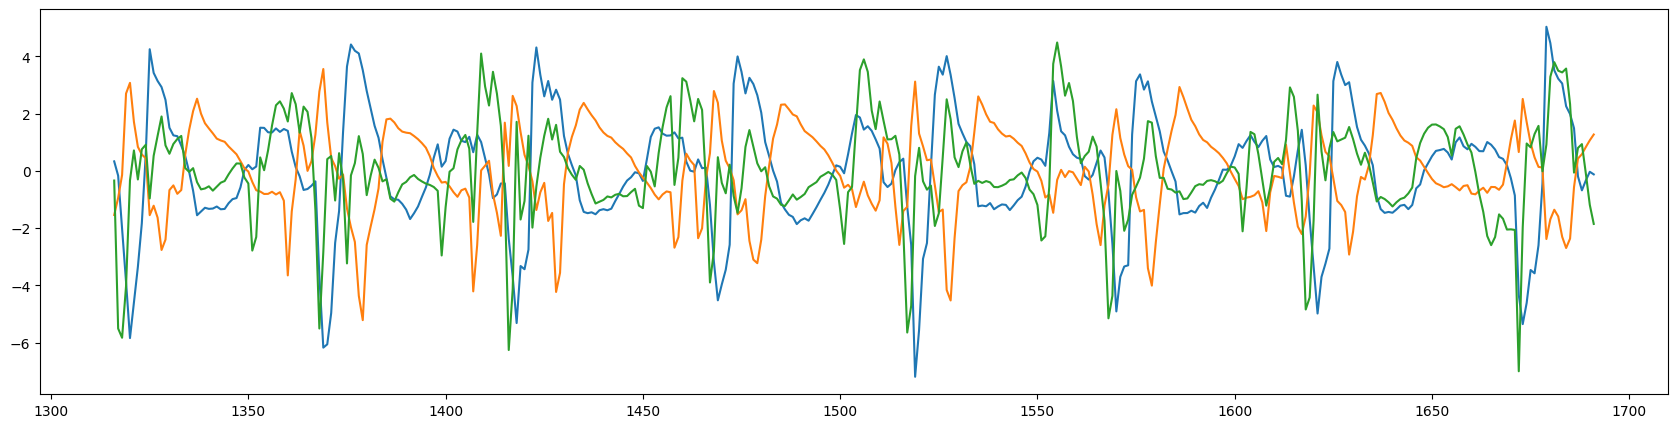

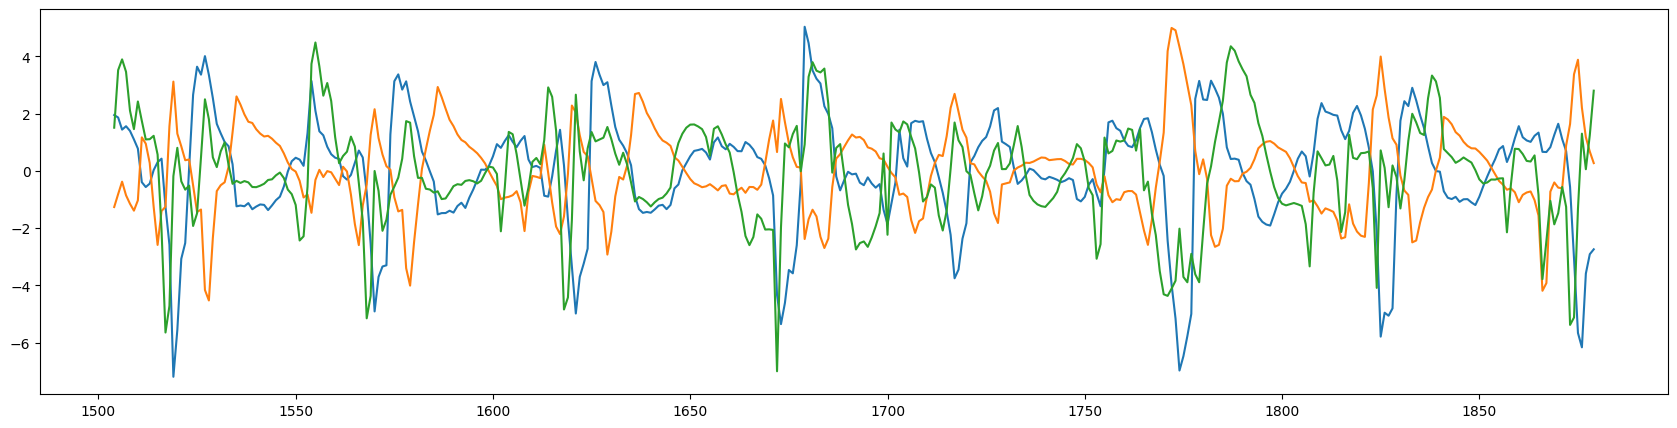

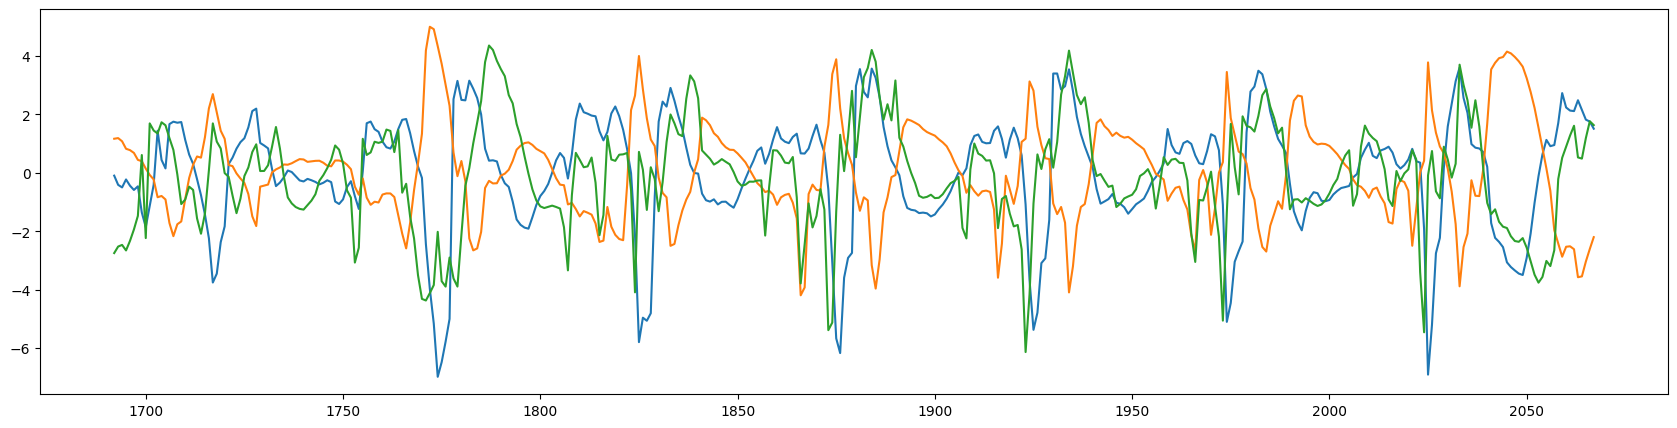

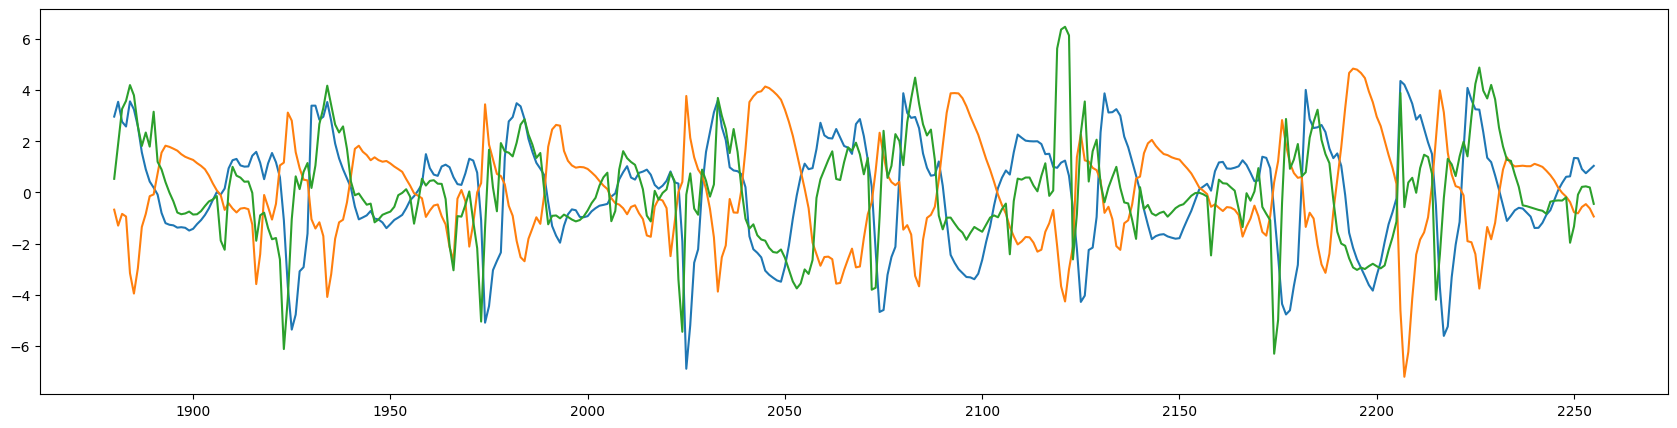

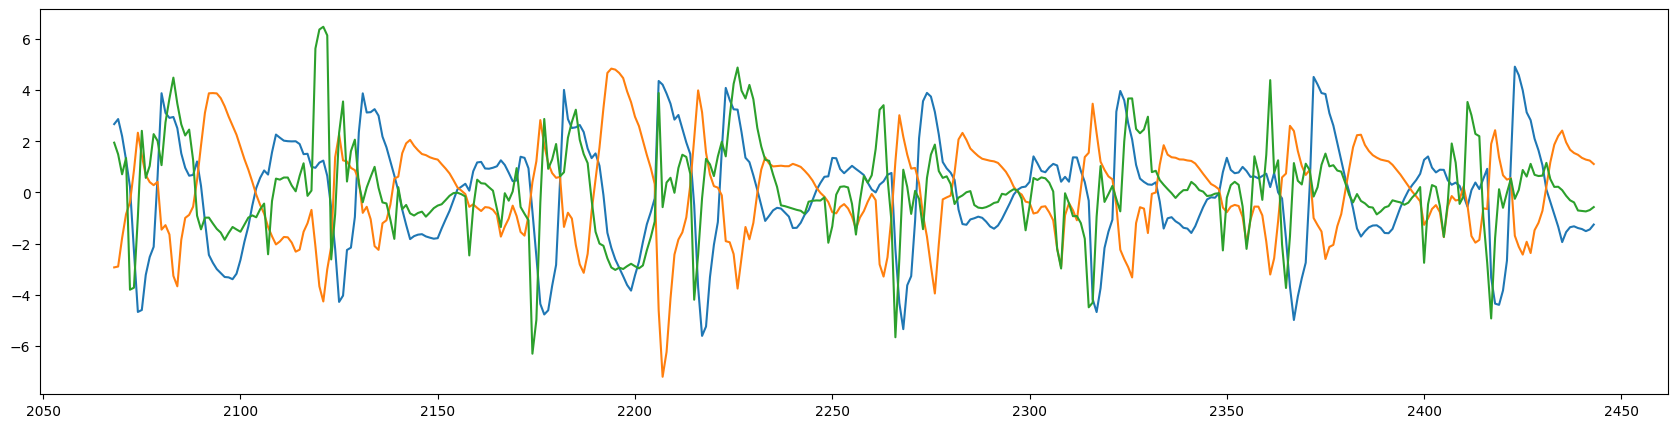

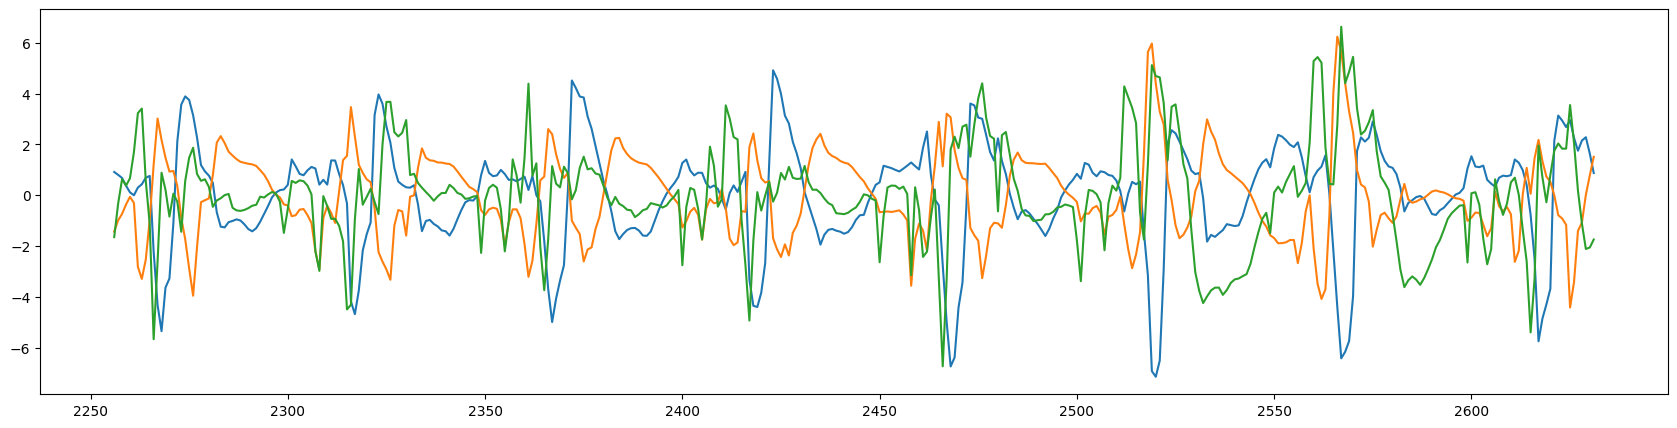

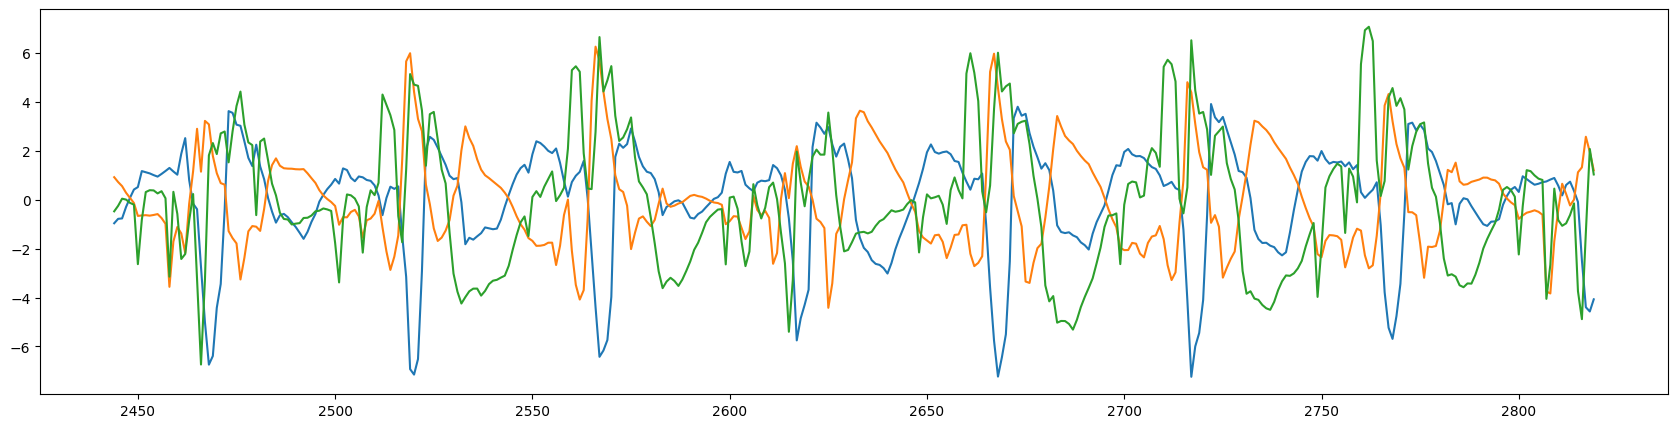

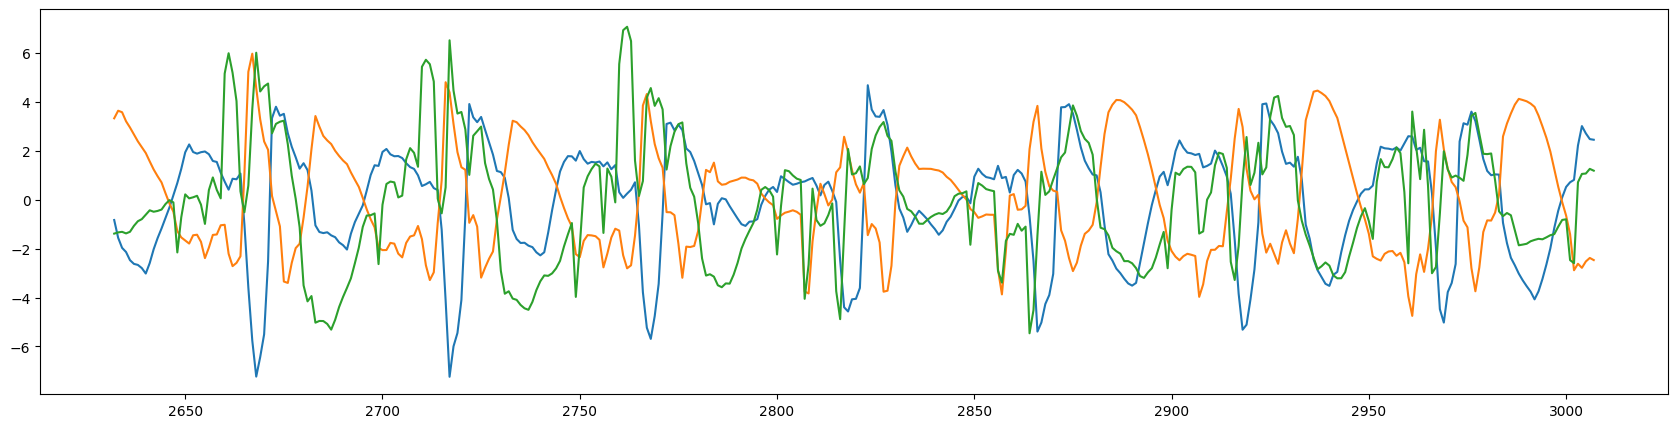

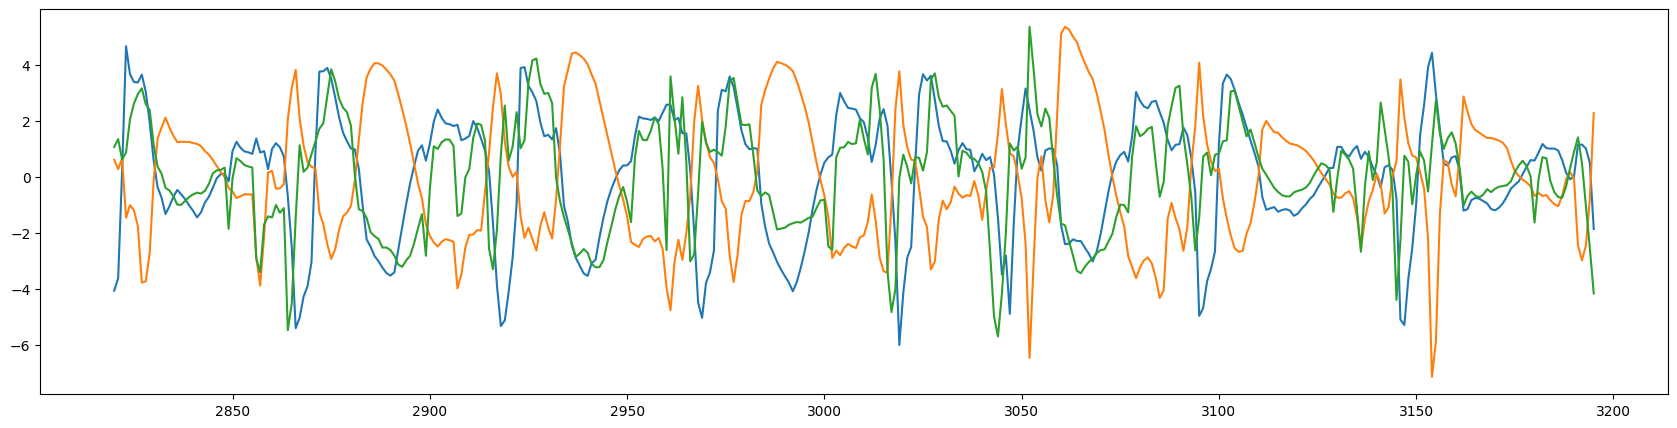

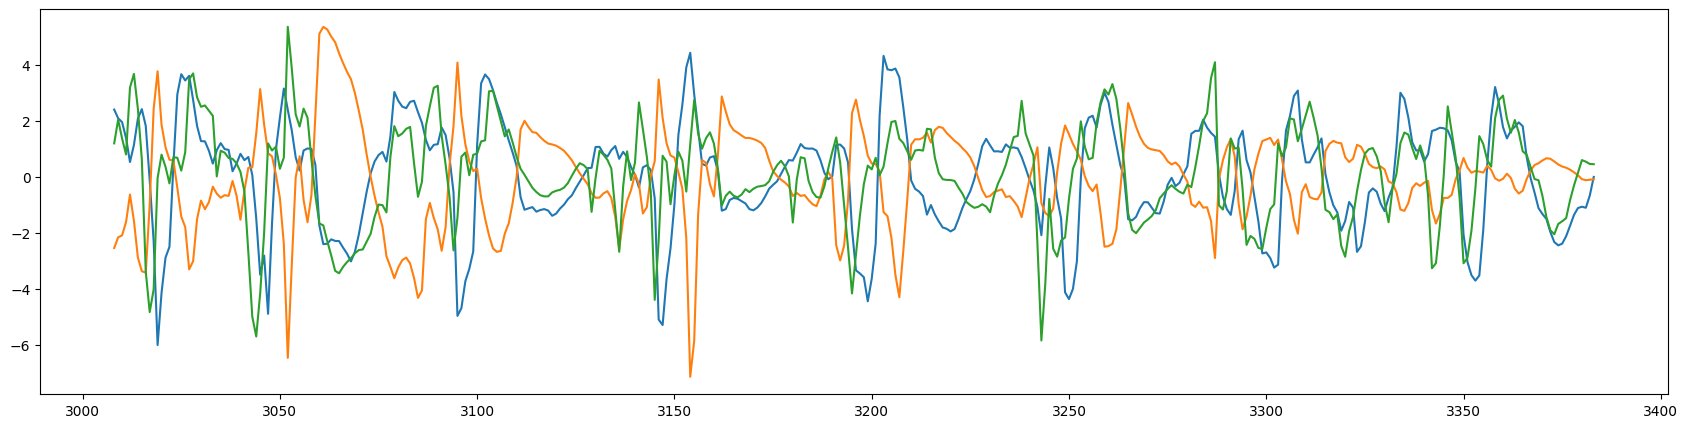

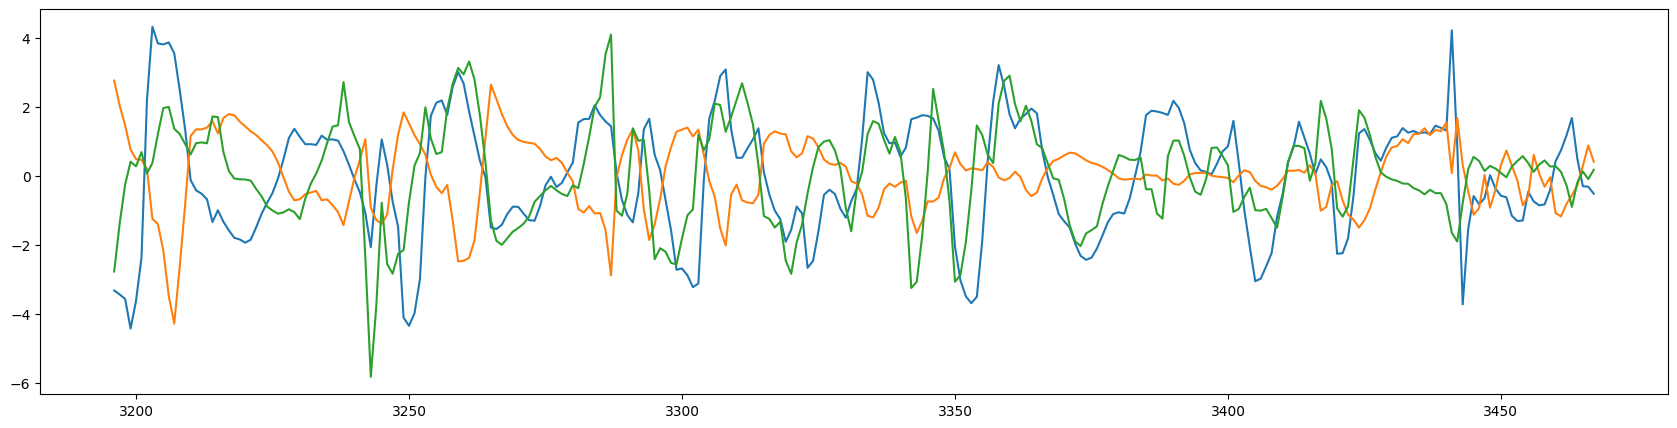

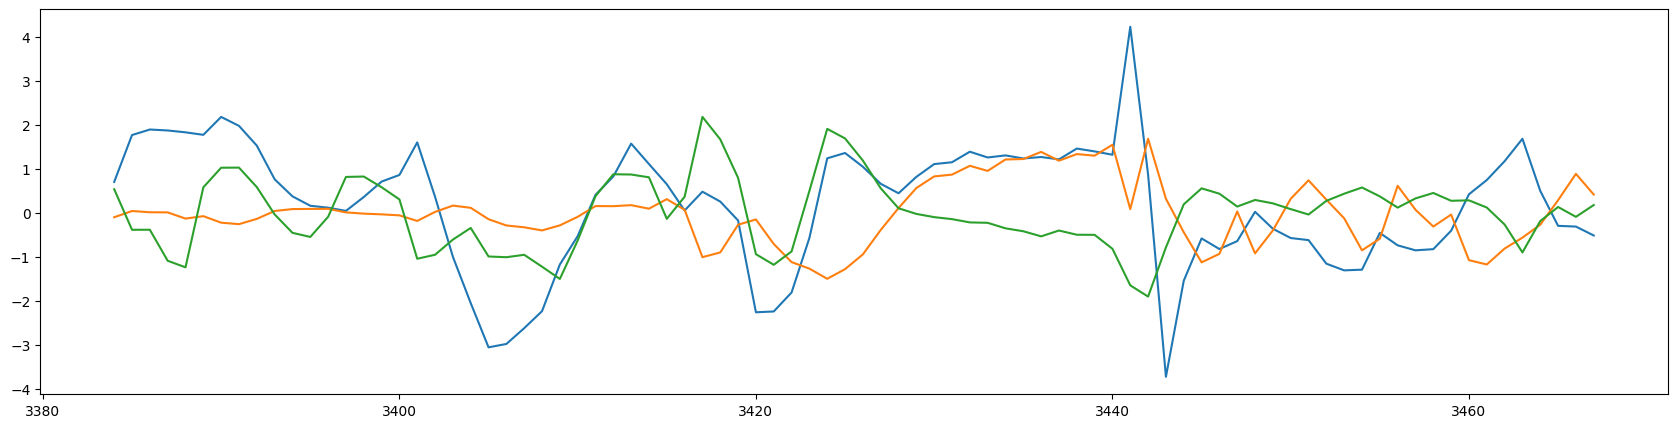

<Figure size 2100x500 with 0 Axes>

In [ ]:
# Segmentation | applying sliding window based segmentation
# problem is that the data for user #1 to #29 has different format 5 columns
# the rest of the users have different format 3 columns
# also the sampling rates were different as the data was collected in different circumstance
# for the sake of simplicity we will work with only first 29 users for now!

#How is this sliding window when there are no overlaps??
# !pip install python_speech_features # ==> You can install the package using this command
# from python_speech_features import sigproc
WINLENGTH = 8  # in seconds
WINSTEP = int(WINLENGTH / 2)  # in seconds
ORIGINAL_USERS = ['User'+str(i+1) for i in range(29)]

def get_sampling_rate(raw_data):
    num_samples = raw_data.shape[0]
    print('num_samples',str(num_samples))
    timestamps = raw_data['time2']
    num_unique_stamps = np.unique(timestamps).shape[0]
    print('num_unique_stamps',str(num_unique_stamps))
    return int(num_samples / num_unique_stamps)

main_df = pd.DataFrame()
for user in ORIGINAL_USERS[:1]:
  for sensor in SENSOR_FILES[0:1]:
      file_path = os.path.join(DATA_PATH, user, 'Training', sensor)
      raw_data = pd.read_csv(file_path, names=[user+'_x', user+'_y', user+'_z', 'time1', 'time2'])
      # print(raw_data.describe())
      samplerate =get_sampling_rate(raw_data)
      print(samplerate)
      window_id = 0
      #sliding window where indow starts at start index , ends at end_index and slides over by 'WINSTEP*samplerate'
      for start_index in range(0, raw_data.shape[0], WINSTEP*samplerate):
          end_index = start_index+WINLENGTH * samplerate
          curr_data_window = raw_data.iloc[start_index:end_index]
          #creat a new column with window _id
          curr_data_window['window_id'] = window_id
          window_id = window_id+1
          print(curr_data_window.head())
          #select xy &z column
          xyz = curr_data_window[[user+'_x',user+'_y',user+'_z']]
          ax = fig.add_subplot(2, 3, 1)
          ax.title.set_text(user+'_x')
          xyz[user+'_x'].plot()
          ax = fig.add_subplot(2, 3, 2)
          ax.title.set_text(user+'_y')
          xyz[user+'_y'].plot()
          ax = fig.add_subplot(2, 3, 3)
          ax.title.set_text(user+'_z')
          xyz[user+'_z'].plot()

          plt.figure()



      # signalX = raw_data[user+'_x']
      # signalY = raw_data[user+'_y']
      # signalZ = raw_data[user+'_z']

      # # Sliding window based cutting of the signal
      # framesX = sigproc.framesig(signalX, WINLENGTH * samplerate, WINSTEP * samplerate)
      # framesY = sigproc.framesig(signalY, WINLENGTH * samplerate, WINSTEP * samplerate)
      # framesZ = sigproc.framesig(signalZ, WINLENGTH * samplerate, WINSTEP * samplerate)

      # # The  sigproc.framesig function fills zeroes in the last unavailable points
      # # we dont want that
      # framesX = framesX[:-1, :]
      # framesY = framesY[:-1, :]
      # framesZ = framesZ[:-1, :]

      # if framesX.shape[1] > 64 and framesX.shape[1] < 128:
      #     FFTLENGTH = 128
      # elif framesX.shape[1] > 128 and framesX.shape[1] < 256:
      #     FFTLENGTH = 256
      # else:
      #     FFTLENGTH = 512



      # print(framesX)

# Feature extration

In [ ]:
# https://tsfresh.readthedocs.io/en/latest/text/quick_start.html
# https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html
# Lets see the descrp stats
# This is incomplete and we need to complete ....

# Segmentation | applying sliding window based segmentation
# problem is that the data for user #1 to #29 has different format 5 columns
# the rest of the users have different format 3 columns
# also the sampling rates were different as the data was collected in different circumstance
# for the sake of simplicity we will work with only first 29 users for now!
!pip install tsfresh
%matplotlib inline
import matplotlib.pylab as plt
import dask.dataframe as dd

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction.settings import MinimalFCParameters
from tsfresh.utilities.distribution import LocalDaskDistributor
from tsfresh.convenience.bindings import dask_feature_extraction_on_chunk
#from tsfresh import Settings

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# #creat dask dataframe to handel large data input
# file_path = os.path.join(DATA_PATH, 'ThesisDataset_10_5_sec.csv')
# df = dd.read_csv(file_path, sep=",", names=['time', 'x', 'y', 'z', 'user', 'sensor', 'session', 'window_id'], blocksize=64e6)

# #df = pd.DataFrame(raw_data)
# df = df.dropna()
# df[['window_id', 'sensor', 'session']] = df[['window_id', 'sensor', 'session']].astype(float)
# df[['x', 'y', 'z']] = df[['x', 'y', 'z']].astype(float)
# print(df.head())

# # Extract features for the current user group
# df_melted = df.melt(id_vars=["user", "time"],  value_vars=["x", "y", "z"], var_name= "kind", value_name= "value")

# # try selecting relevant features
# df_grouped = df_melted.groupby('user')
# #for user, group in grouped_df:
# # def dask_feature_extraction_on_chunk(chunk):
# #     return extract_features(chunk, column_id="user", column_sort="time",
# #                             column_kind="kind", column_value="value",
# #                             default_fc_parameters=MinimalFCParameters())

# # Apply the feature extraction function on the grouped chunks
# #features = grouped_df.apply(dask_feature_extraction_on_chunk, meta='object')

# # Compute the result
# #features_computed = features.compute().reset_index(drop=True)
# features = dask_feature_extraction_on_chunk(df_grouped, column_id="window_id", column_kind="kind",
#                                              column_sort="time", column_value="value",
#                                              default_fc_parameters=MinimalFCParameters())


# features = features.categorize(columns=["variable"])
# features = features.reset_index(drop=True) \
#                 .pivot_table(index="window_id", columns="variable", values="value", aggfunc="mean")
# features.to_csv("output")

# #X = extract_features(group.compute().reset_index(drop=True), column_id="window_id", column_sort="time", pivot=False)





#

# #this works
file_path = os.path.join(DATA_PATH, 'ThesisDataset_10_5_sec.csv')
df = pd.read_csv(file_path, sep=",", names=['time', 'x', 'y', 'z', 'user', 'sensor', 'session', 'window_id'], nrows = 500)

#df = pd.DataFrame(raw_data)
df = df.dropna()
df[['window_id', 'sensor', 'session']] = df[['window_id', 'sensor', 'session']].astype(float)
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].astype(float)
print(df.head())

grouped_df = df.groupby('user')
user_features = {}
for user, group in grouped_df:
    # Extract features for the current user group
    features = extract_features(group, column_id="window_id", column_sort="time", pivot=False)
    user_features[user] = features

    # Create a CSV file for each user
    user_feature_file = f"user_{user}'s_features.csv"
    user_feature_path = os.path.join("/content/drive/MyDrive/RESEARCH 2023/", user_feature_file)

    # Save the features to the CSV file
    features.to_csv(user_feature_path)


    # Print the features for the current user
    print(f"Features for User {user}:")
    print(features)
    print()
    print(user_features)

# from tsfresh.convenience.bindings import dask_feature_extraction_on_chunk
# features = dask_feature_extraction_on_chunk(df_grouped,  column_id="window_id",column_kind="kind",
#                                             column_sort="time",
#                                             column_value="value")
# ddf = dd.read_csv(file_path)
# ddf.isnull().any().compute()
# ddf = ddf.dropna()












# #use parallelizatopn to shorten extraction runtime
# Distributor = MultiprocessingDistributor(n_workers=4,disable_progressbar=False, progressbar_title="Feature Extraction")
# #Distributor = LocalDaskDistributor(n_workers=3)
# X = extract_features(timeseries_container=df, column_id='window_id', column_sort='time', distributor=Distributor)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-53-91b730b48bb2>:76: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=",", names=['time', 'x', 'y', 'z', 'user', 'sensor', 'session', 'window_id'])


       time       x       y       z  user  sensor  session  window_id
1  578165.0 -0.0911  0.7477 -0.6515    12     2.0      1.0        9.0
2  578166.0  0.0087  0.7368 -0.6755    12     2.0      1.0        9.0
3  578167.0  0.0886  0.7193 -0.6887    12     2.0      1.0        9.0
4  578168.0  0.0083  0.6824 -0.7150    12     2.0      1.0        9.0
5  578169.0 -0.1163  0.6558 -0.6662    12     2.0      1.0        9.0


Feature Extraction: 100%|██████████| 120/120 [13:44<00:00,  6.87s/it]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Feature Extraction: 100%|██████████| 108/108 [24:17<00:00, 13.49s/it]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Feature Extraction: 100%|██████████| 120/120 [26:06<00:00, 13.05s/it]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To cha